#**INN HOTELS**

##**Context**

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

##**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

##**Data Description**

###Data Dictionary

- Booking_ID: the unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
Not Selected – No meal plan selected
- Meal Plan 1 – Breakfast
- Meal Plan 2 – Half board (breakfast and one other meal)
- Meal Plan 3 – Full board (breakfast, lunch, and dinner)
- required_car_parking_space: Does the customer require a car parking space? (0 No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer before the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer before the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

##**Importing necessary libraries and data**

In [283]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

#To build model for prediction
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
  )

import warnings
warnings.filterwarnings("ignore")


##Data Overview

In [284]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [285]:
data = pd.read_csv("/content/drive/MyDrive/AIML/Supervised_Learning/INNHotelsGroup.csv")

In [286]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

**First and last 5 rows of the dataset**

In [287]:
# looking at head (first 5 observations)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [288]:
# looking at tail (last 5 observations)
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [289]:
#Checking the shape of the dataset
df.shape

(36275, 19)

- There are 36275 rows and 19 columns contained in dataset.

In [290]:
#Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- There are 19 categories, 13 of these categories being integer datatype, 5 of them being object, and only 1 of them being a float
- There seems to be no missing values for any of these columns

In [291]:
#checking for duplicates
df.duplicated().sum()

0

- There are no missing values present in dataset.

In [292]:
#Checking is there any null value present or not
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [293]:
#Statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


- Average number of adults is around 2 people per room, while the median is 2, which will probably indicate that this dataset represents a normal distribution
- The number of children dataset may contain outliers since the max number of children is 10 and that the mean indicates that most parents do not bring their children with them when they go to stay at a hotel
- Most of guest are preffer to stay in week days
- There are no more repeated guest
- The average lead time is 85 days and maximum with 443
- Average price per room is around $103 and the medianis 99.45, which may indicate that there is skewness is this part of the graph
- Most people have canceled their bookings

In [294]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


- Booking ID is unique identifier number for each guest
- There are 4 unique type of meal plans available

##**Exploratory Data Analysis (EDA)**

In [295]:
# function to create histogram boxplot

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  sharex=True,  gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize )

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [296]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category

        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [297]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5) )
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [298]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###**Univariate Analysis**

**Observation on no of adults**

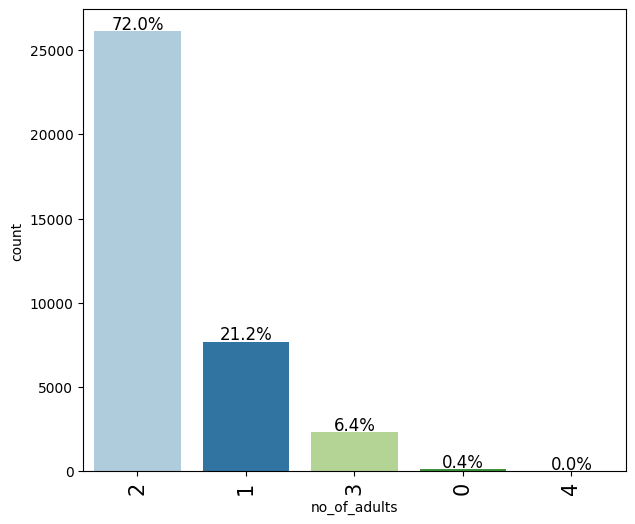

In [299]:
labeled_barplot(df, "no_of_adults", perc = True)

**Observation on no of children**

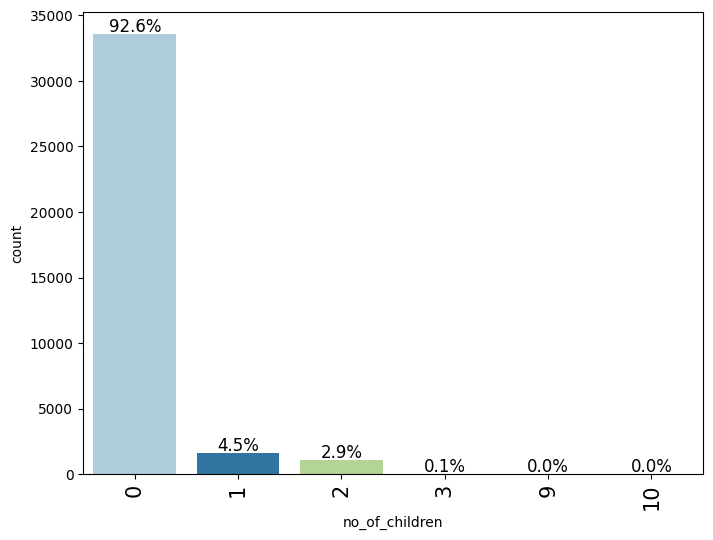

In [300]:
labeled_barplot(df, "no_of_children", perc = True)

**Observation on no of weekend nights**

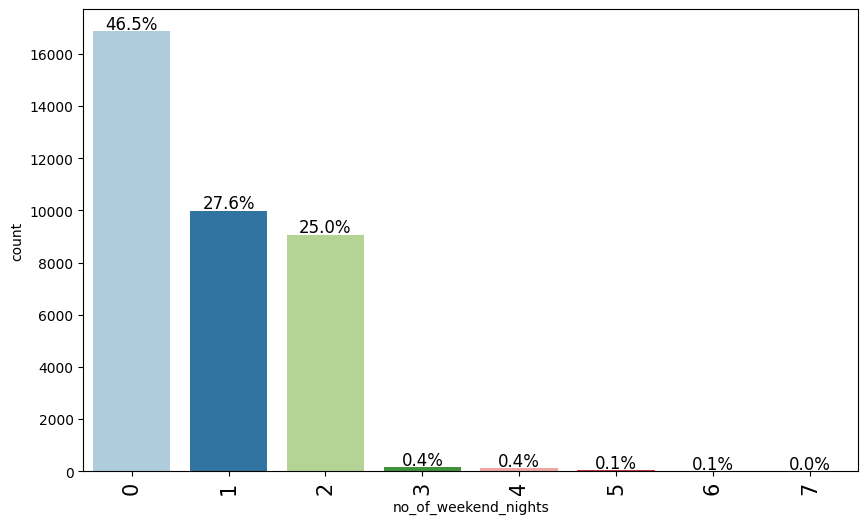

In [301]:
labeled_barplot(df, "no_of_weekend_nights", perc = True)

**Observation on no of week nights**

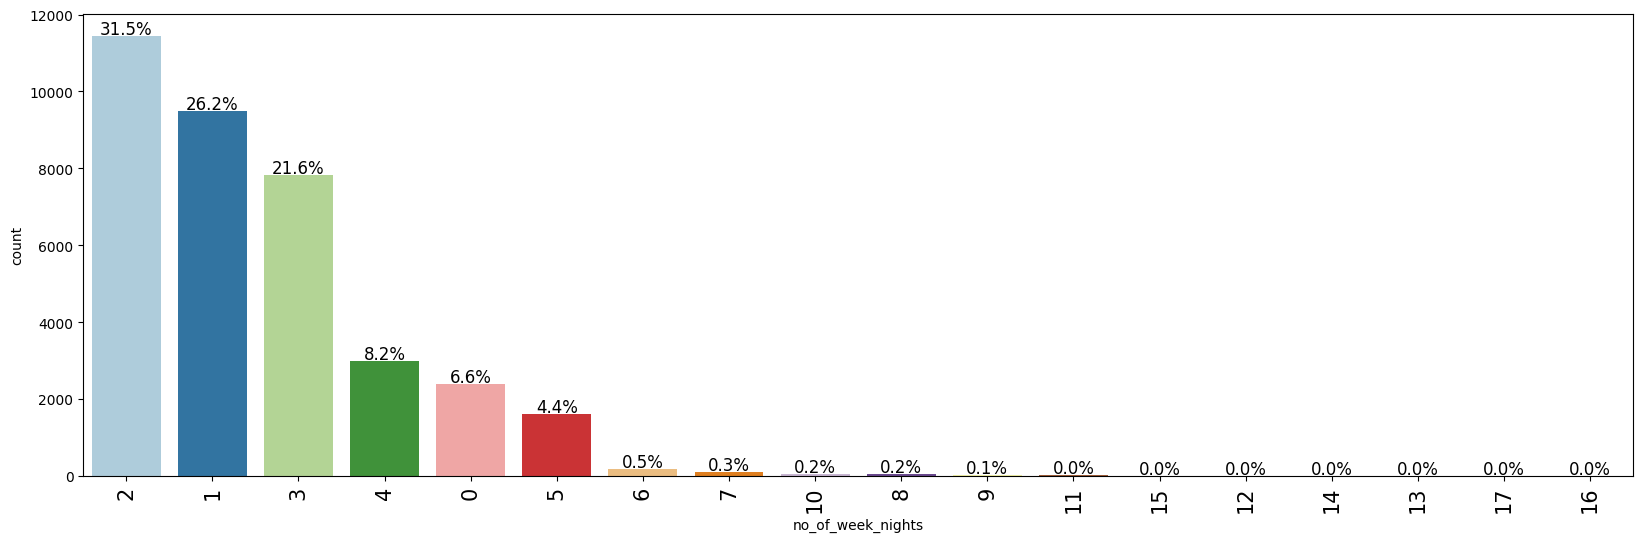

In [302]:
labeled_barplot(df, "no_of_week_nights", perc = True)

**Observation on type of meal plan**

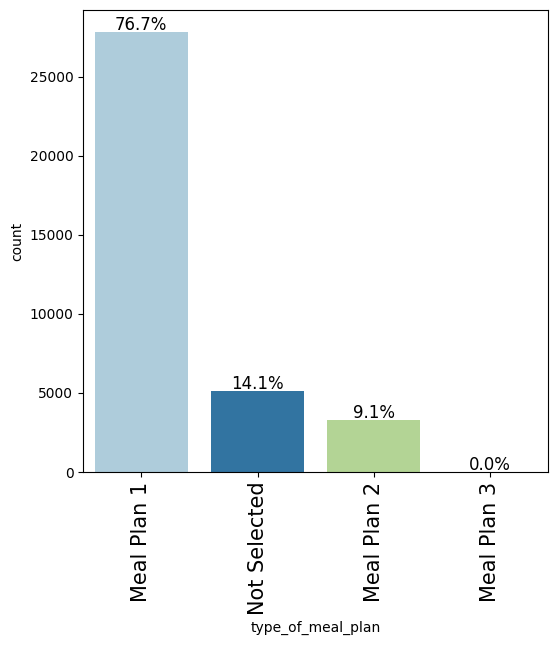

In [303]:
labeled_barplot(df, "type_of_meal_plan", perc = True)

- Meal plan 1 (Breakfast) preffered amoung of all meal plans

**Observation on car parking space**

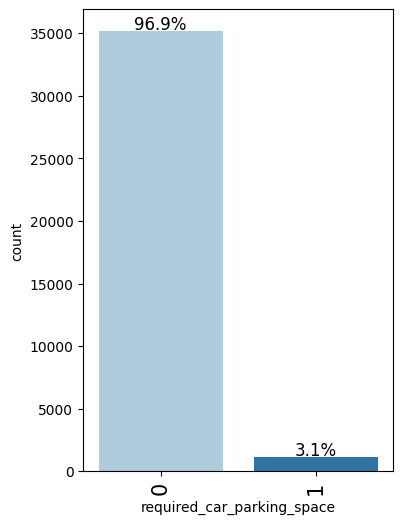

In [304]:
labeled_barplot(df, "required_car_parking_space", perc = True)

- Most of the guest not required car parking space

**Observation on room type reserved**

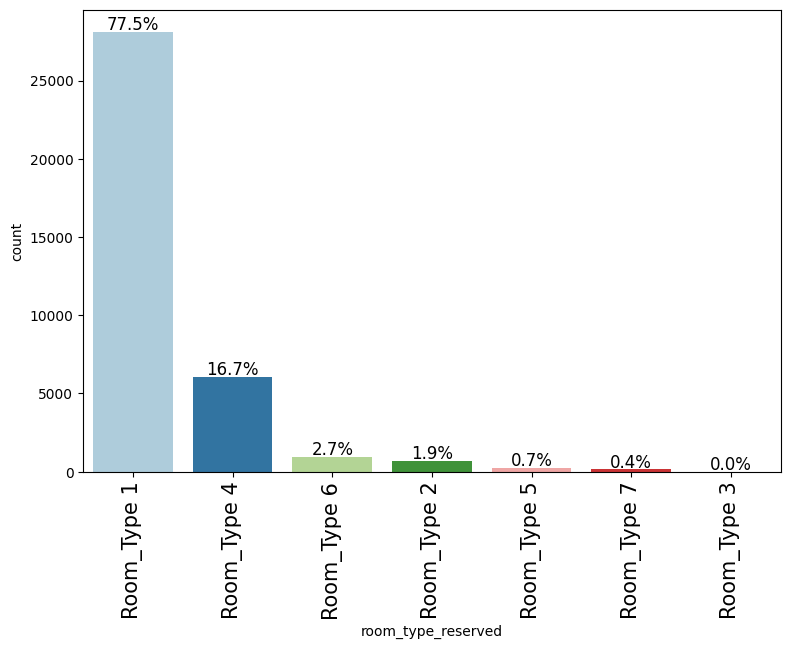

In [305]:
labeled_barplot(df, "room_type_reserved", perc = True)

- Most of the guest preffered room type 1

**Observation on lead time**

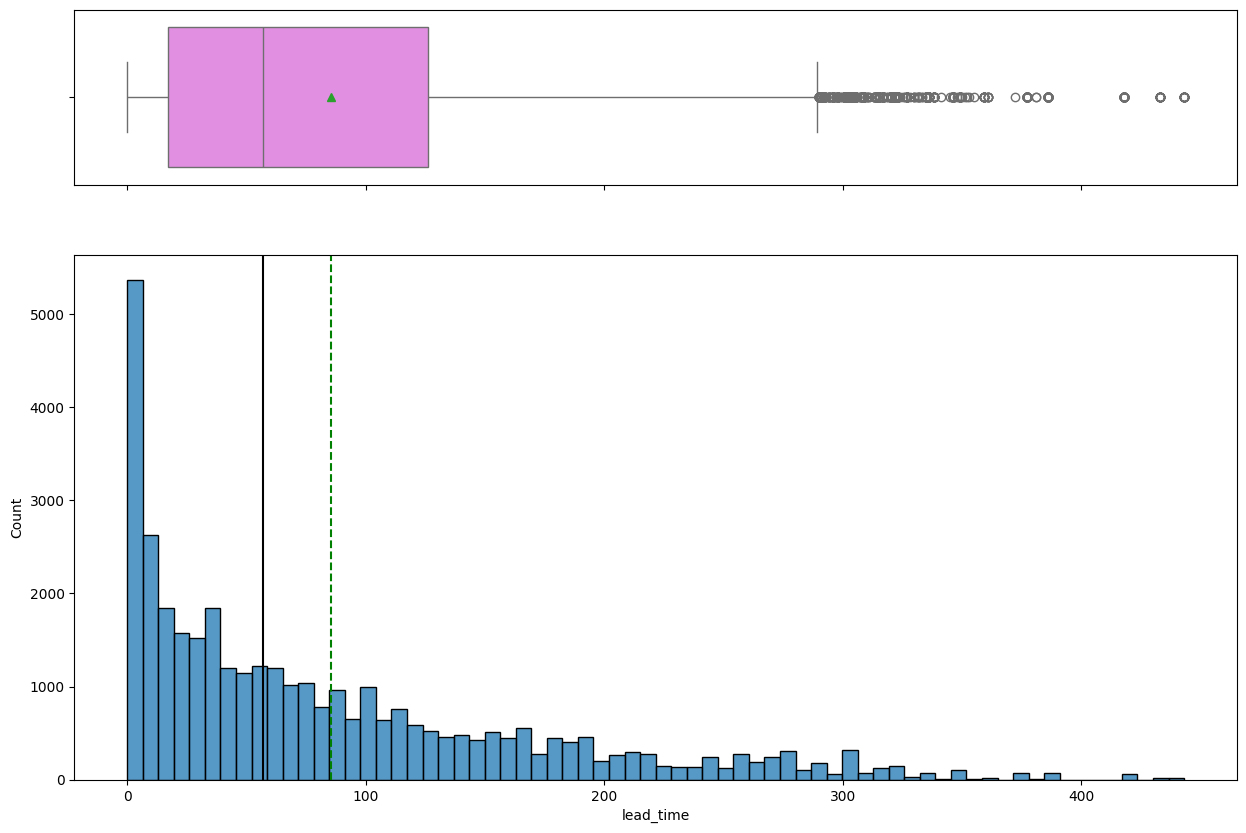

In [306]:
histogram_boxplot(df, "lead_time",)

- The average lead time is 85 days and maximum with 443
- Lead time present with skeweness of data

**Observation on arrival year**

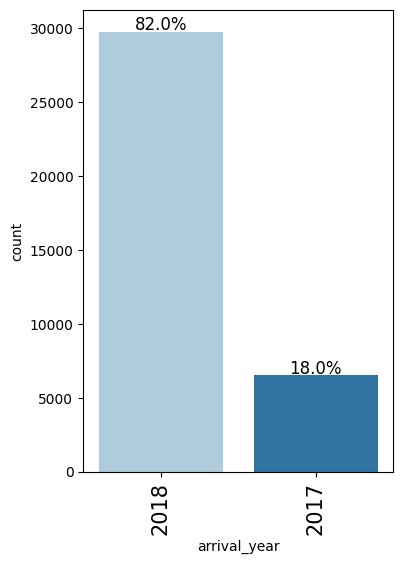

In [307]:
labeled_barplot(df, "arrival_year", perc = True)

- These data is most of 2018 year

**Observation on arrival month**

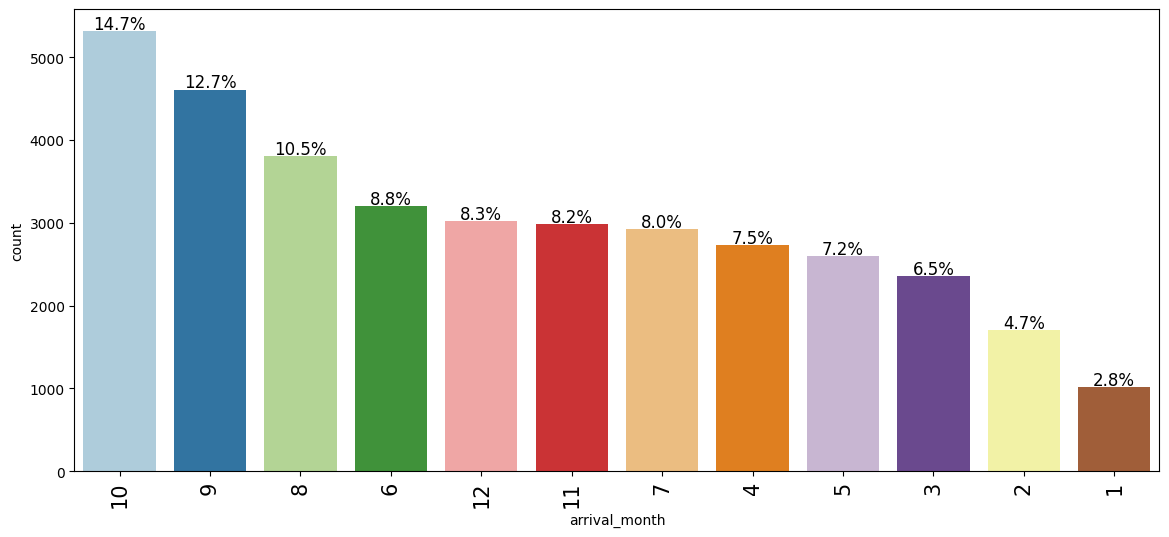

In [308]:
labeled_barplot(df, "arrival_month", perc = True)

**Observation on arrival day**

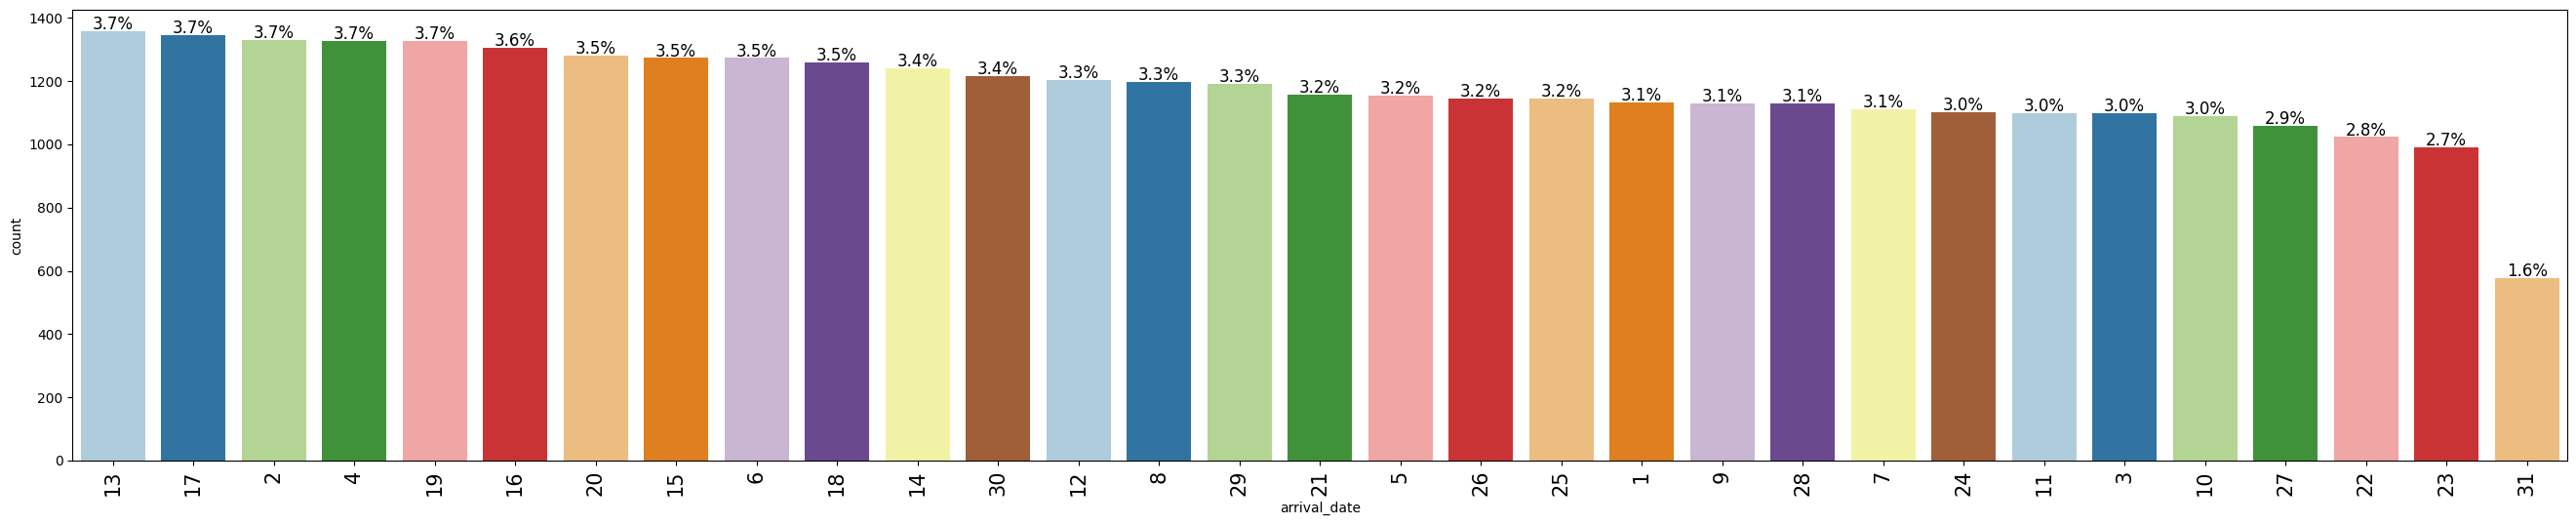

In [309]:
labeled_barplot(df, "arrival_date", perc = True)

**Observation on market segement type**

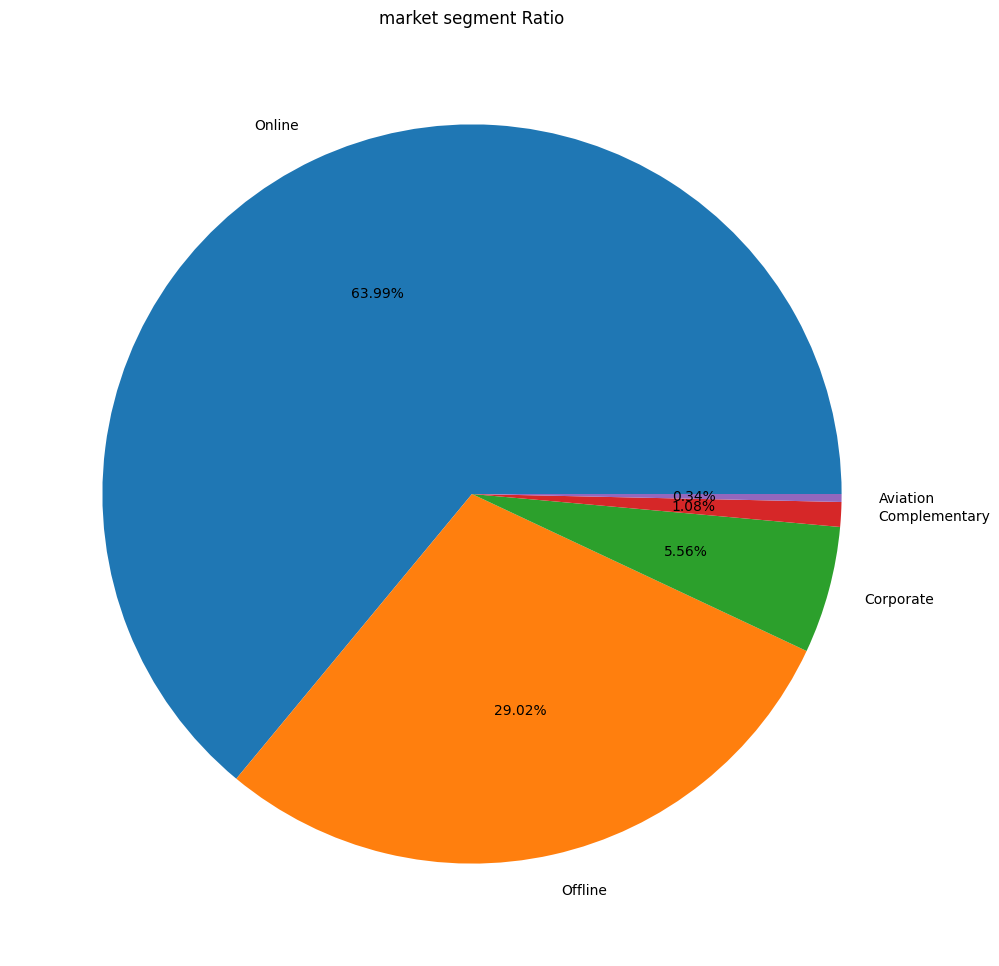

In [310]:
market_segment_count = df["market_segment_type"].value_counts()

# Plot a pie chart
plt.figure(figsize=(12, 12))
plt.pie(market_segment_count, labels=market_segment_count.index, autopct='%1.2f%%')
plt.title('market segment Ratio')
plt.show()

- Around 64% online market segment type

**Observation on repeated guest**

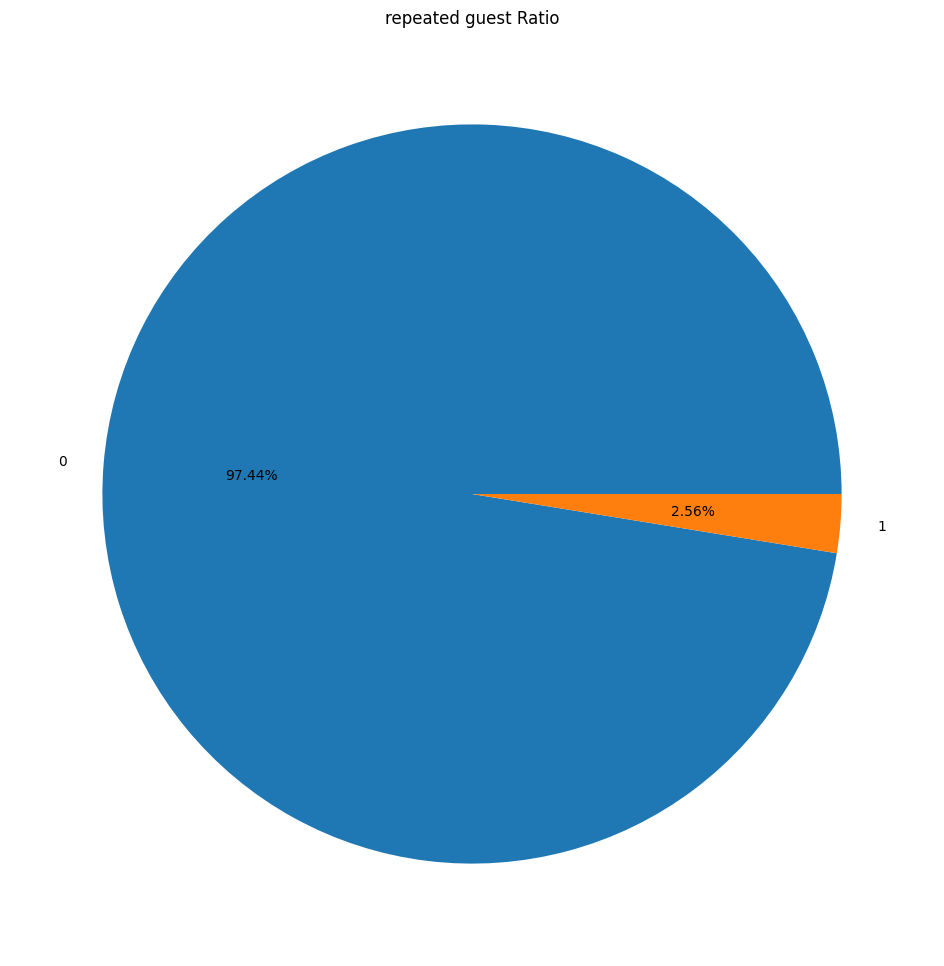

In [311]:
repeated_guest_count = df["repeated_guest"].value_counts()

# Plot a pie chart
plt.figure(figsize=(12, 12))
plt.pie(repeated_guest_count, labels=repeated_guest_count.index, autopct='%1.2f%%')
plt.title('repeated guest Ratio')
plt.show()

- 97% guests are visiting hotel first time

**Observation on booking cancellations**

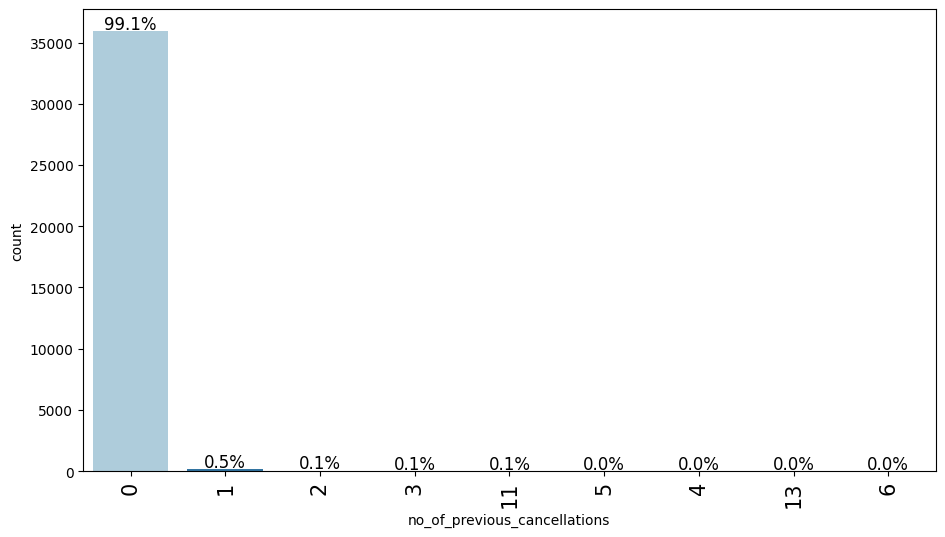

In [312]:
labeled_barplot(df, "no_of_previous_cancellations", perc = True)

**Observation on confirmed booking**

In [313]:
booking_cancellation_by_10_times = df.no_of_previous_bookings_not_canceled.value_counts().head(11)
booking_cancellation_by_10_times

,count
no_of_previous_bookings_not_canceled,
0,35463
1,228
2,112
3,80
4,65
5,60
6,36
7,24
8,23


- Minimum cancellation happens, this ratio is good in the sense of company revenue

**Observation on average price of room**

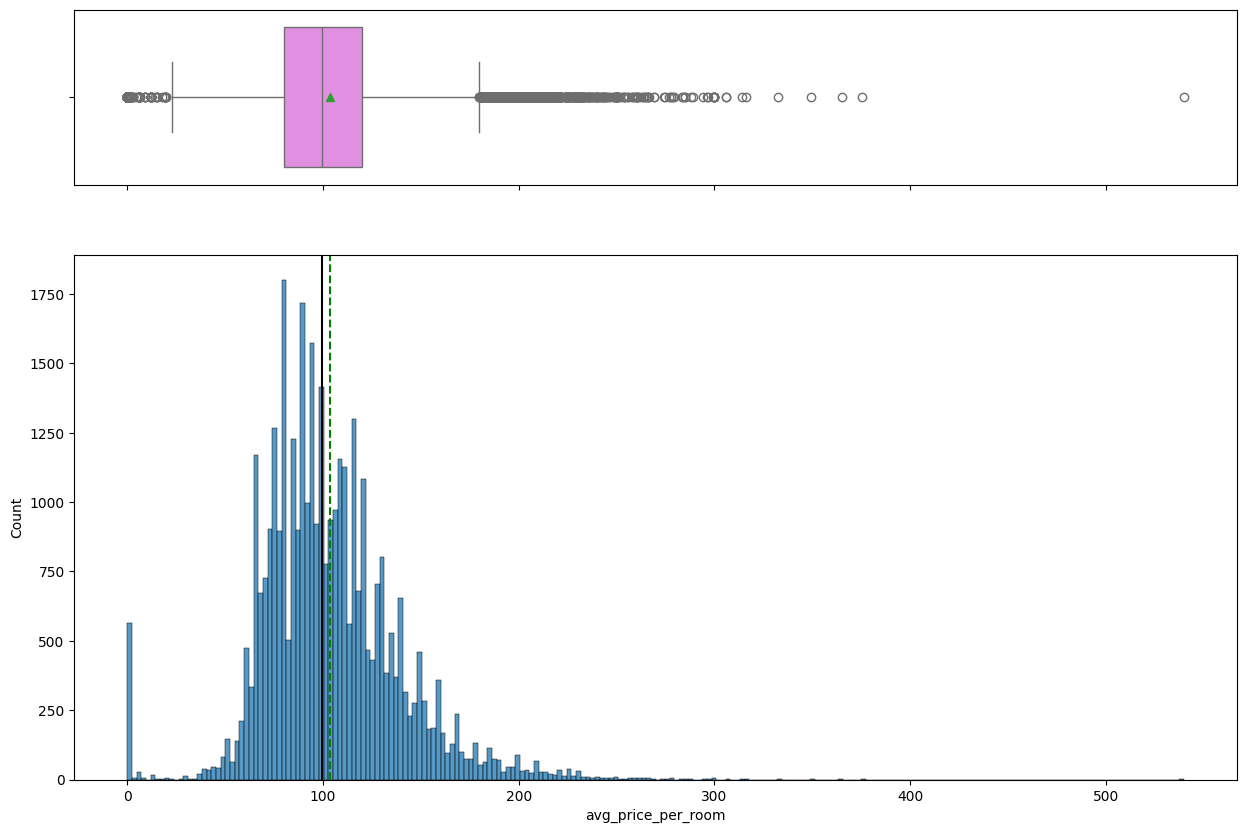

In [314]:
histogram_boxplot(df, "avg_price_per_room")

- Average price per room is around $103 and the medianis 99.45, which may indicate that there is skewness is this part of the graph

**Observation on booking status**

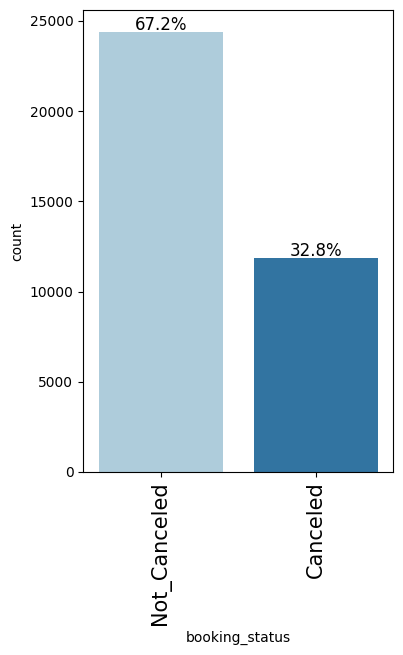

In [315]:
labeled_barplot(df, "booking_status", perc = True)

- Most of booking not canceled

**Observation on special request**

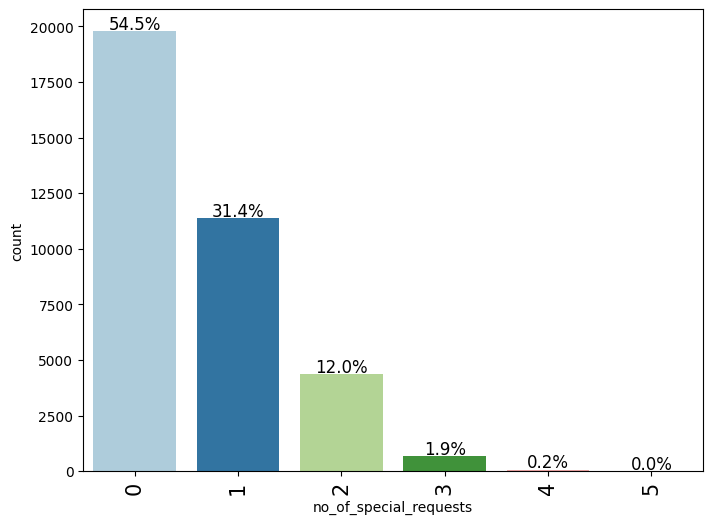

In [316]:
labeled_barplot(df, "no_of_special_requests", perc = True)

###**Bivariate Analysis**

**Correlation**

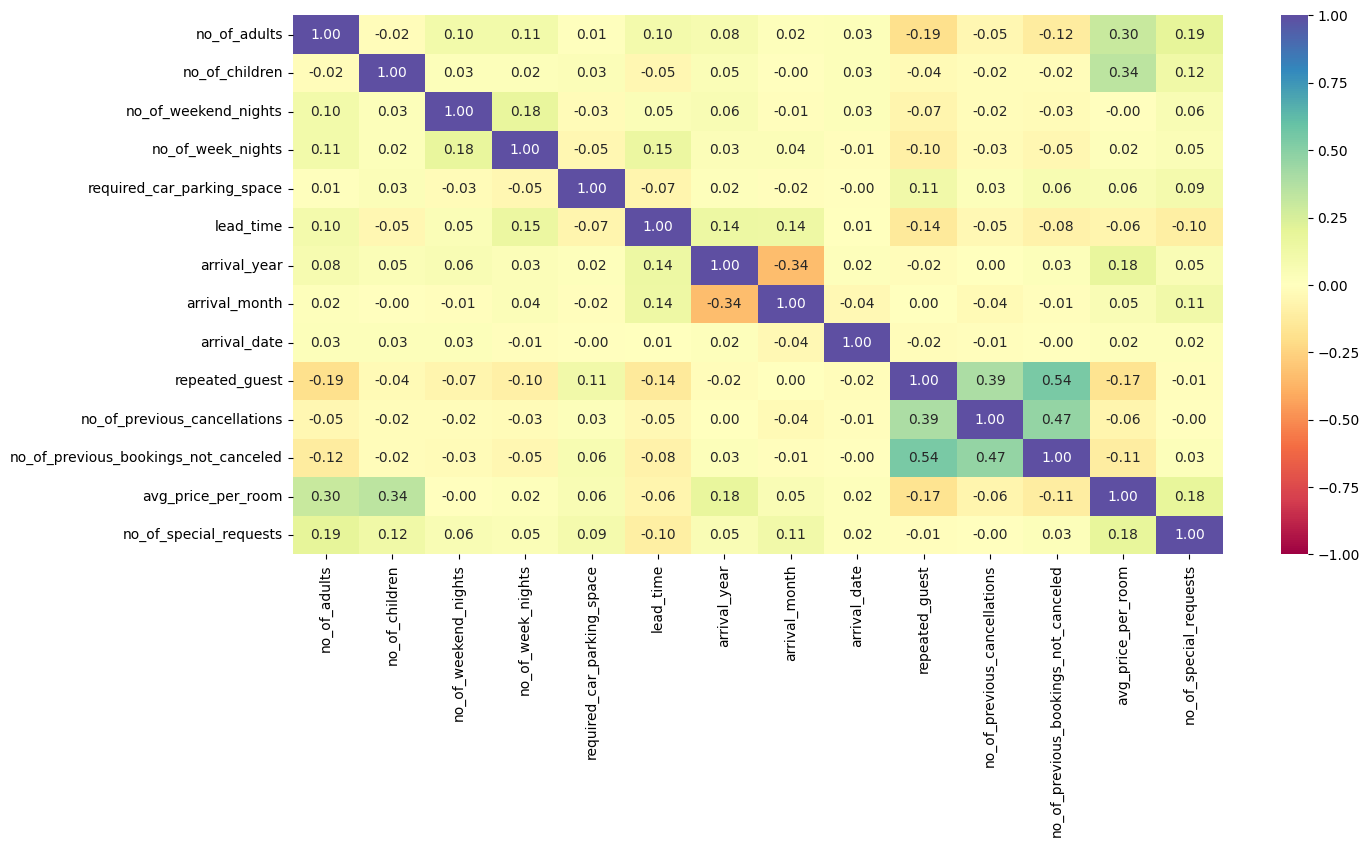

In [317]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- No quantitative variables are correlated with each other besides repeated guests and number of previous bookings not cancelled, which may indicate that there is some brand loyalty when it comes to repeated guests

In [318]:
#sns.pairplot(df, diag_kind = "kde")

**Observation on no of adults vs booking status**

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


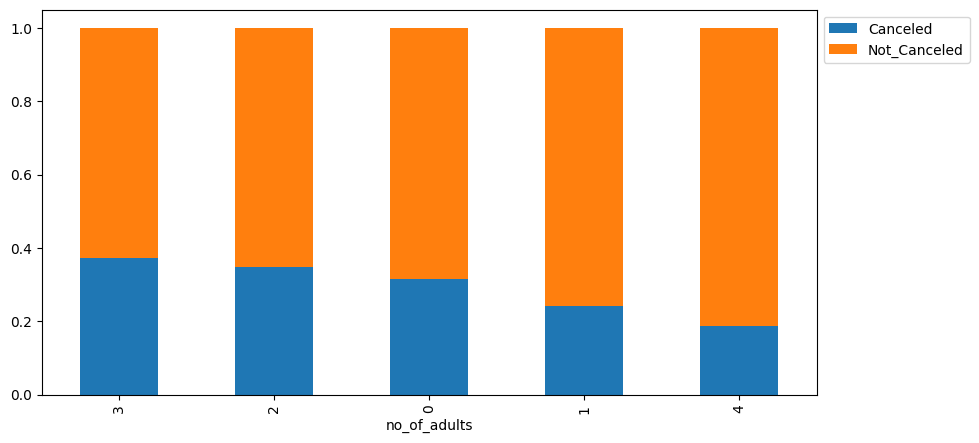

In [319]:
stacked_barplot(df, "no_of_adults", "booking_status")

- If 3 number of adults then there will be chance of booking cancellation.

**Observation on no of children vs booking status**

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


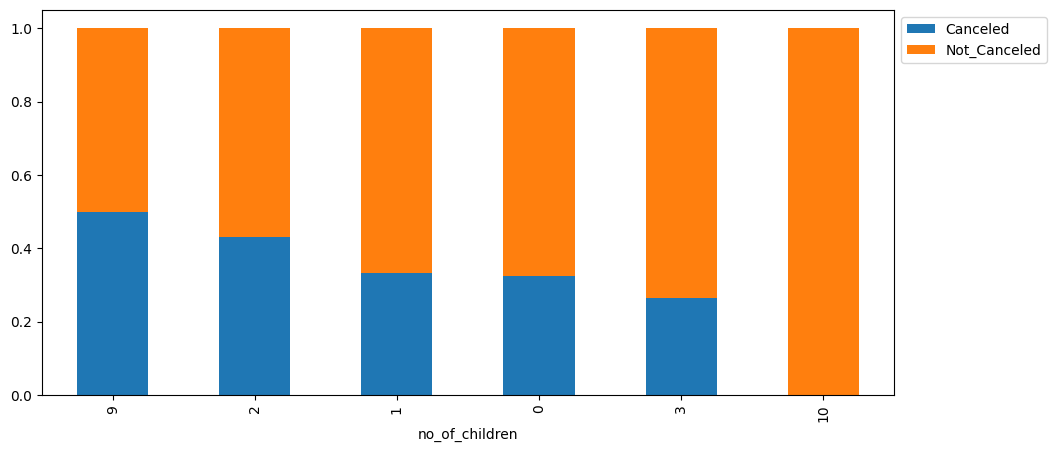

In [320]:
stacked_barplot(df, "no_of_children", "booking_status")

**Observation on no of weekend night vs booking status**

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


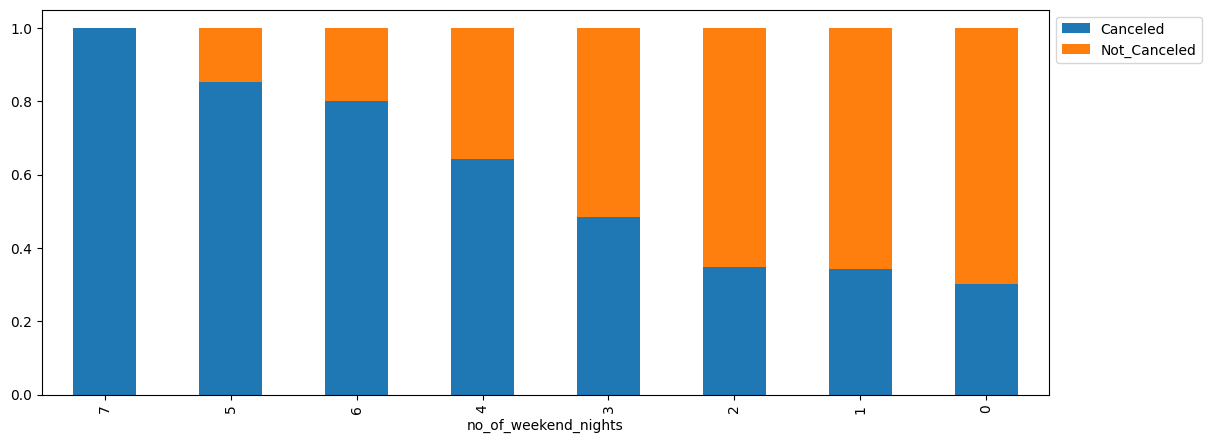

In [321]:
stacked_barplot(df, "no_of_weekend_nights", "booking_status")

**Observation on no of week night vs booking status**

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

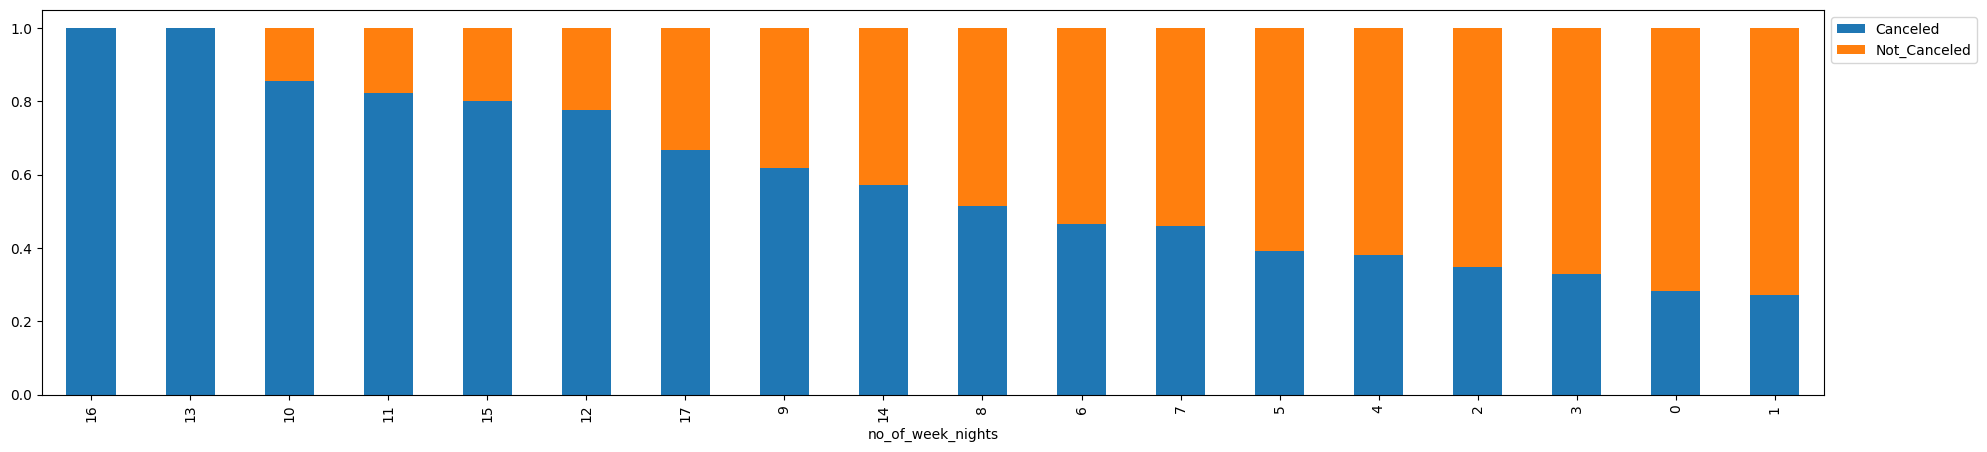

In [322]:
stacked_barplot(df, "no_of_week_nights", "booking_status")

**Observation on meal plan vs booking status**

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


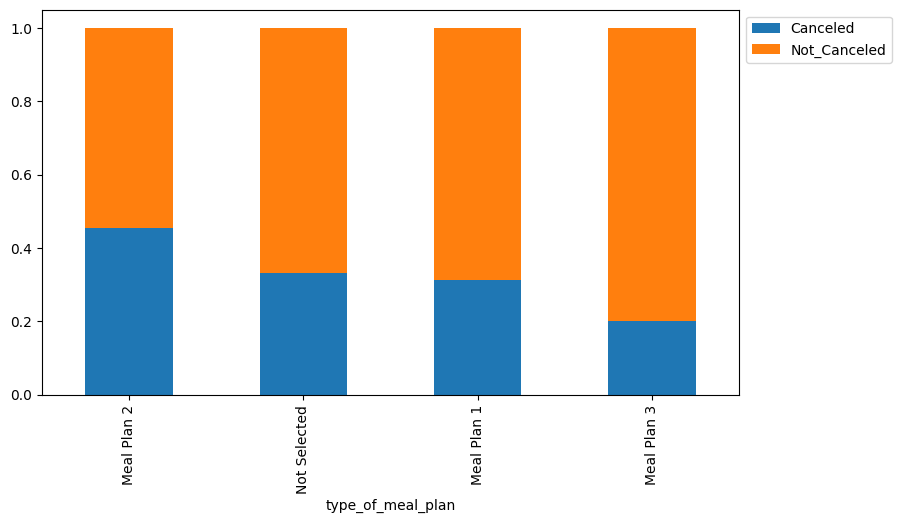

In [323]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

**Observation on car parking vs booking status**

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


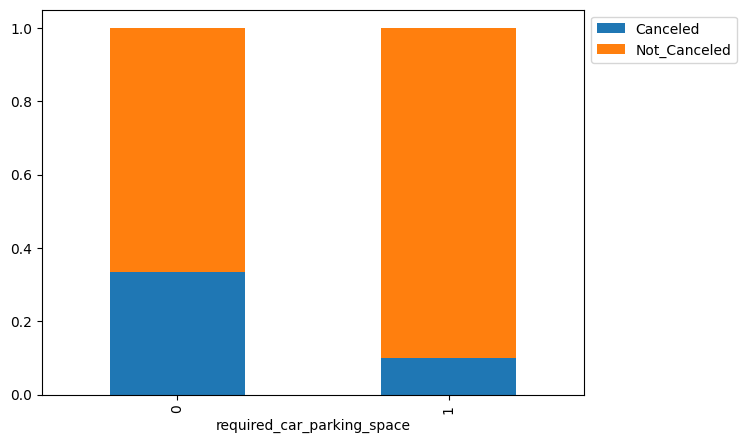

In [324]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

**Observation on room reservation vs booking status**

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


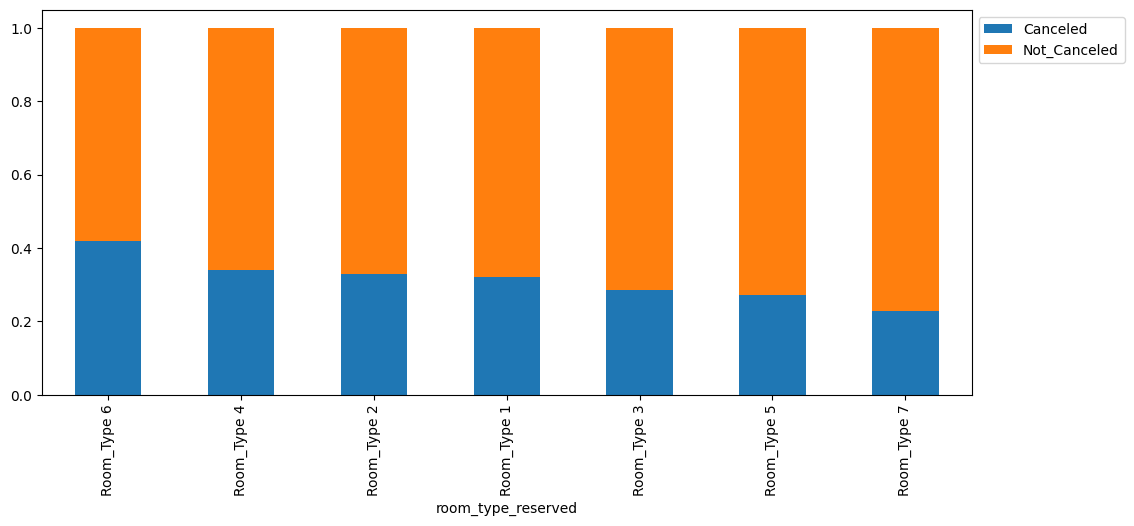

In [325]:
stacked_barplot(df, "room_type_reserved", "booking_status")

**Observation on market segment type vs booking status**

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


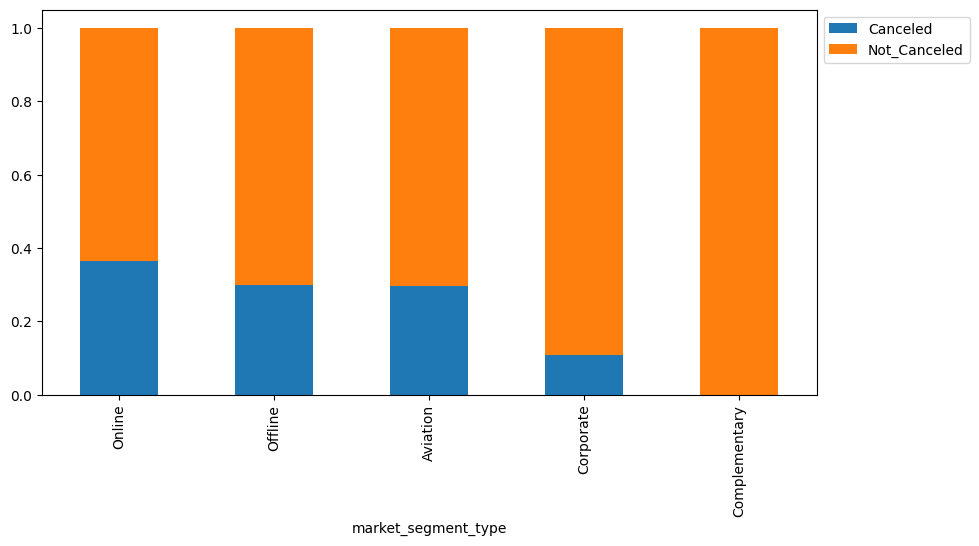

In [326]:
stacked_barplot(df, "market_segment_type", "booking_status")

- Most of the cancellations when customers book the hotel online and almost no cancellations happen when it is complementary

**Observation on repeated geust vs booking status**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


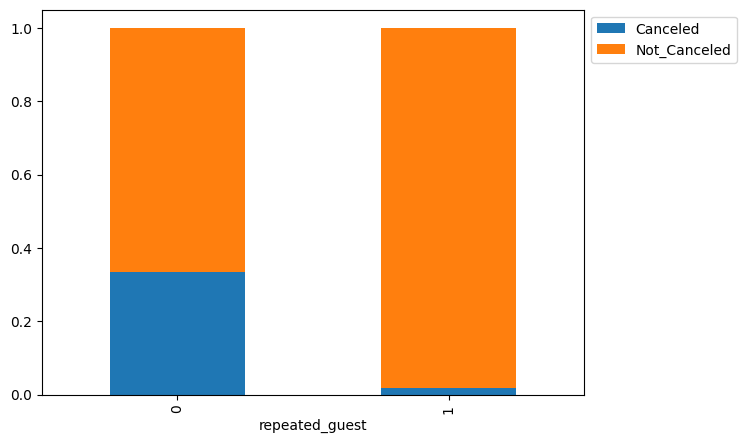

In [327]:
stacked_barplot(df, "repeated_guest", "booking_status")

**Observation on number of previous calcellation vs booking status**

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


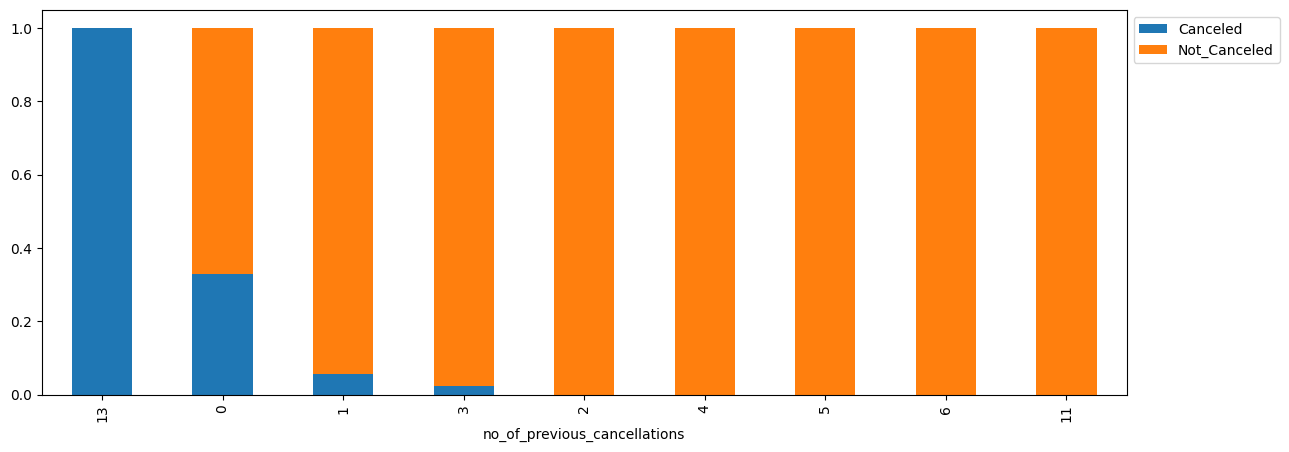

In [328]:
stacked_barplot(df, "no_of_previous_cancellations", "booking_status")

**Observation on number of previous calcellation vs booking status**

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1                                            4           224    228
12                                           1            11     12
4                                            1            64     65
6                                            1            35     36
2                                            0           112    112
44                                           0             2      2
43                                           0             1      1
42                                           0             1      1
41                                           0             1      1
40                                           0             1      1
38                                           0  

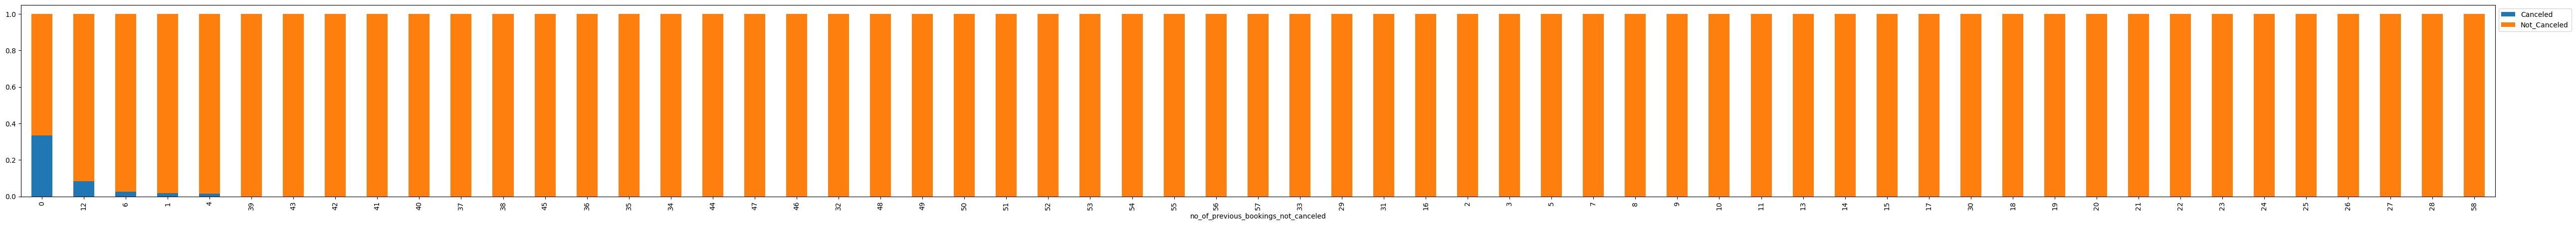

In [329]:
stacked_barplot(df, "no_of_previous_bookings_not_canceled", "booking_status")

**Observation on no of previous calcellation vs booking status**

In [330]:
(df.groupby("booking_status")["avg_price_per_room"].count()).sort_values(ascending = False).head(10)

#stacked_barplot(df, "avg_price_per_room", "booking_status")

,avg_price_per_room
booking_status,
Not_Canceled,24390
Canceled,11885


**Observation on special request vs booking status**

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


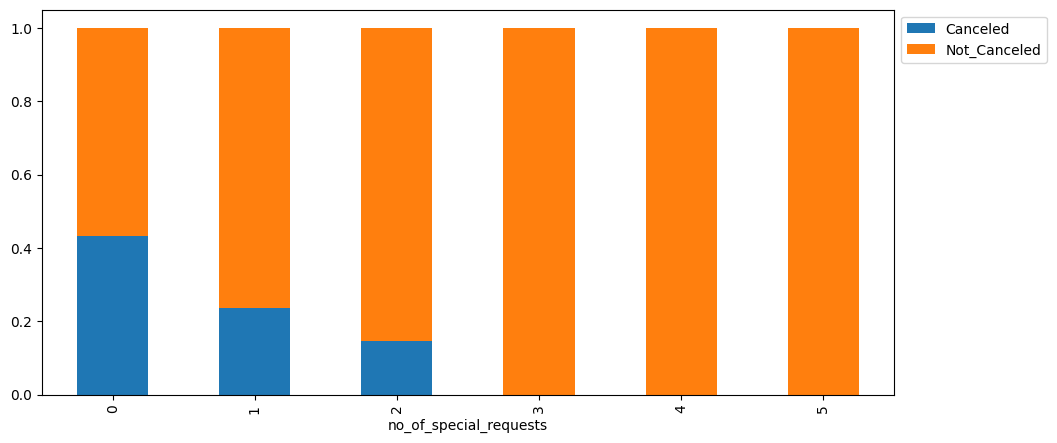

In [331]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

- When there is no special requests, you can see that there are more more cancellations. When there is more special requests, there is less likelihood of cancellation

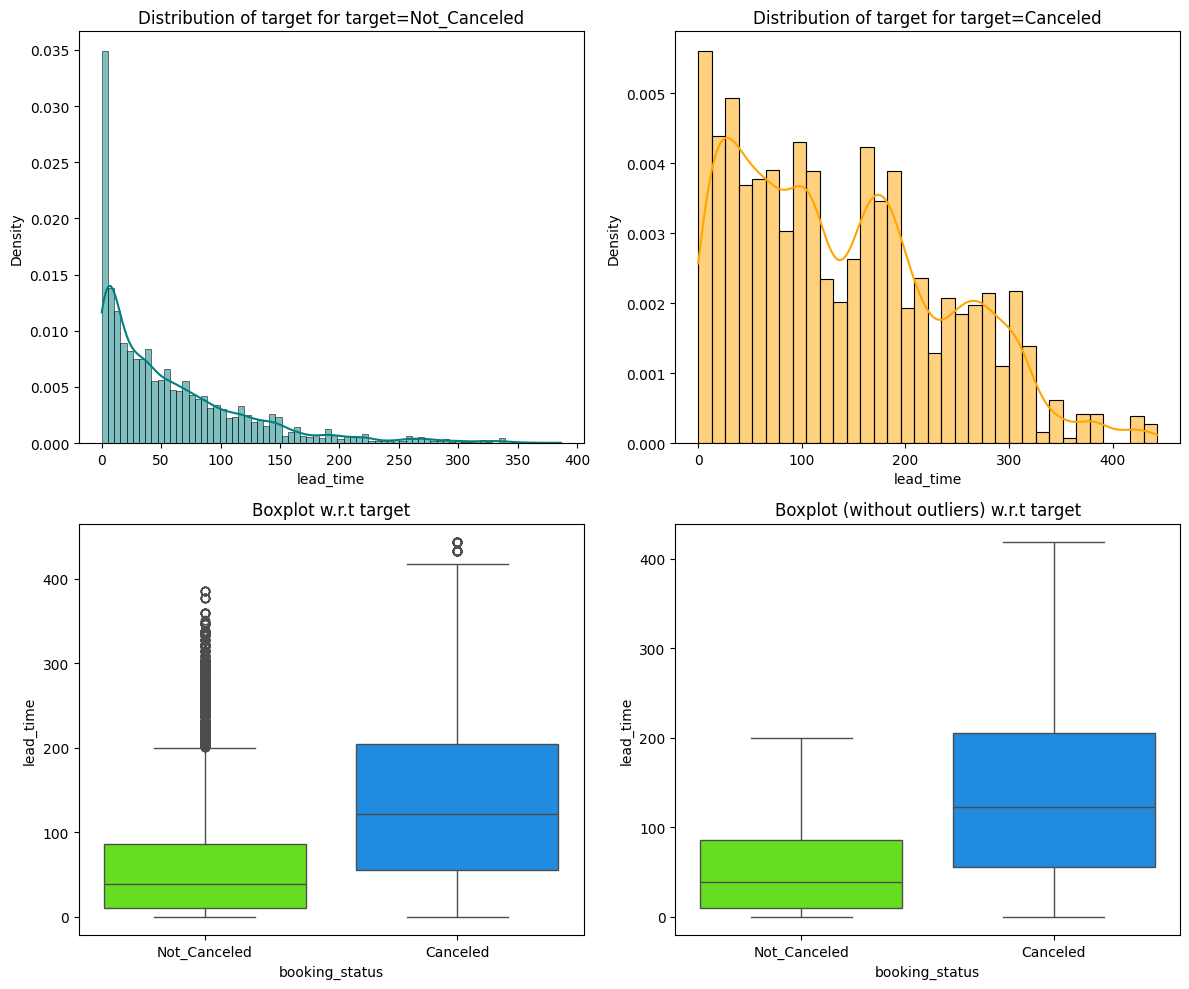

In [332]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

<Axes: xlabel='arrival_year', ylabel='avg_price_per_room'>

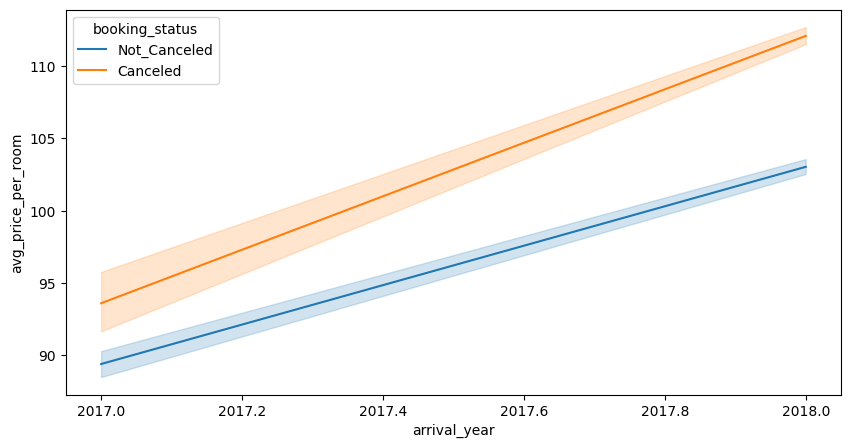

In [333]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = df , x = "arrival_year", y = "avg_price_per_room", hue = "booking_status")

- Average price per room increased in 2018, also cancellation of booking done increases in year of 2018

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

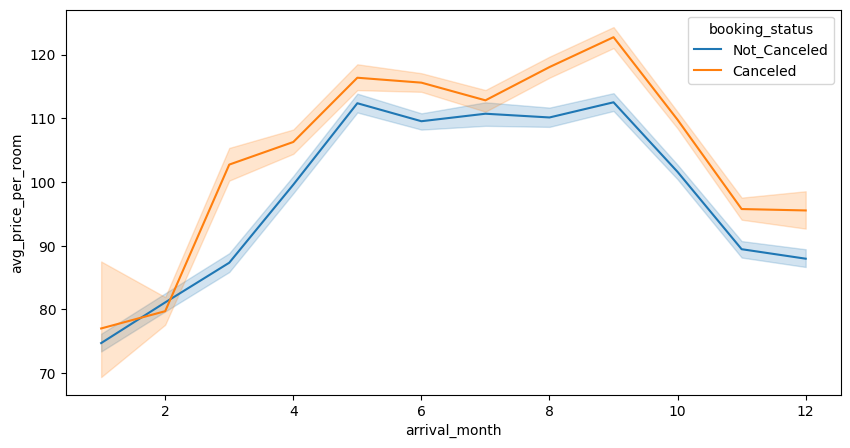

In [334]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = df , x = "arrival_month", y = "avg_price_per_room", hue = "booking_status")

- In mid year (month 4 to 9) most of the booking done at average price of $110

<Axes: xlabel='arrival_date', ylabel='avg_price_per_room'>

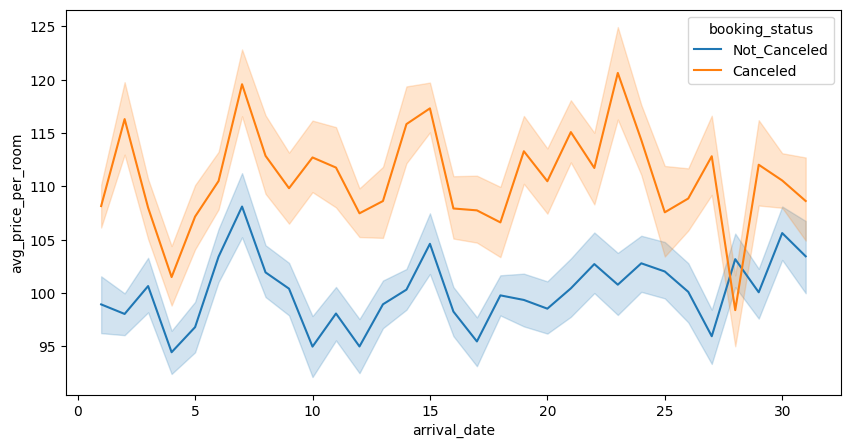

In [335]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = df , x = "arrival_date", y = "avg_price_per_room", hue = "booking_status")

- There is little fall down in between 25 to 30 date of month

###**EDA Questions:**

1. What are the busiest months in the hotel?

**Month 10 = October with 14.7% of the total booking for the year.**

2. Which market segment do most of the guests come from?

**Online 23214 or 64% of the bookings come via the internet.**

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

**Online booking are the highest despite also having the highest amount of free rooms (I suppose they are redeemed from online retailers points systems) Aviation, Offline, and Corporate are generally slightly lower priced with Corporate edging out for the lowest. Complimentary are of course free.**

4. What percentage of bookings are canceled?

**about 1/3 (11885) of bookings are canceled in the sample data.**

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

**Repeating guest rarely cancel (1.75%).**

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**The absence of special request increases the likelihood of cancellation, the addition of special request begins to reduce the likelihood of cancellation at one and progressively reduces cancellation to Zero on the instance of a third request.**

###**EDA Insights:**

- Peak Season : Late Summer / Early Fall (AUG – OCT) is the busiest time of the year for the hotel chain.
- Online Dominance : Nearly 2/3 of bookings come from online sources.
- Pricing : Average room rates hover around €100. Online bookings tend to be the most expensive.
- Of 36275 room rentals 545 were free of charge over the course of the survey.
- Online booked rooms have the highest cost of booking.
- Loyal Guests : Repeated guest rarely cancel, meaning the level of satisfaction that guest is likely very high.
- Guest who make special request for their stay, are significantly less likely to cancel the reservation.
- 72% of adults who book rooms have another adult staying with them.
- Children are rare at the hotels, as 92.6% of booking don’t include children in the rooms.
- 52.6% of bookings include at least one weekend night.
- The hotel rarely has long stay guests.
- Parking is not a factor almost all the guest, I wouldn’t bother promoting it.
- Room types though nice to have are largely unneeded, 90% of room type booked are type1 & type4.
- Breakfast only plan is the most popular, and the ‘FULL BOARD’ plan is almost never booked.
- The further out in terms of day that rooms are booked the more likely they are to be canceled.
- The client has a robust pricing structure.


##**Data Preprocessing**

In [336]:
#Checking missing values from columns
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [337]:
#Dropping the booking ID columns as this is not contribute much
df = df.drop(["Booking_ID"], axis = 1)

In [338]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

**Outlier detection**

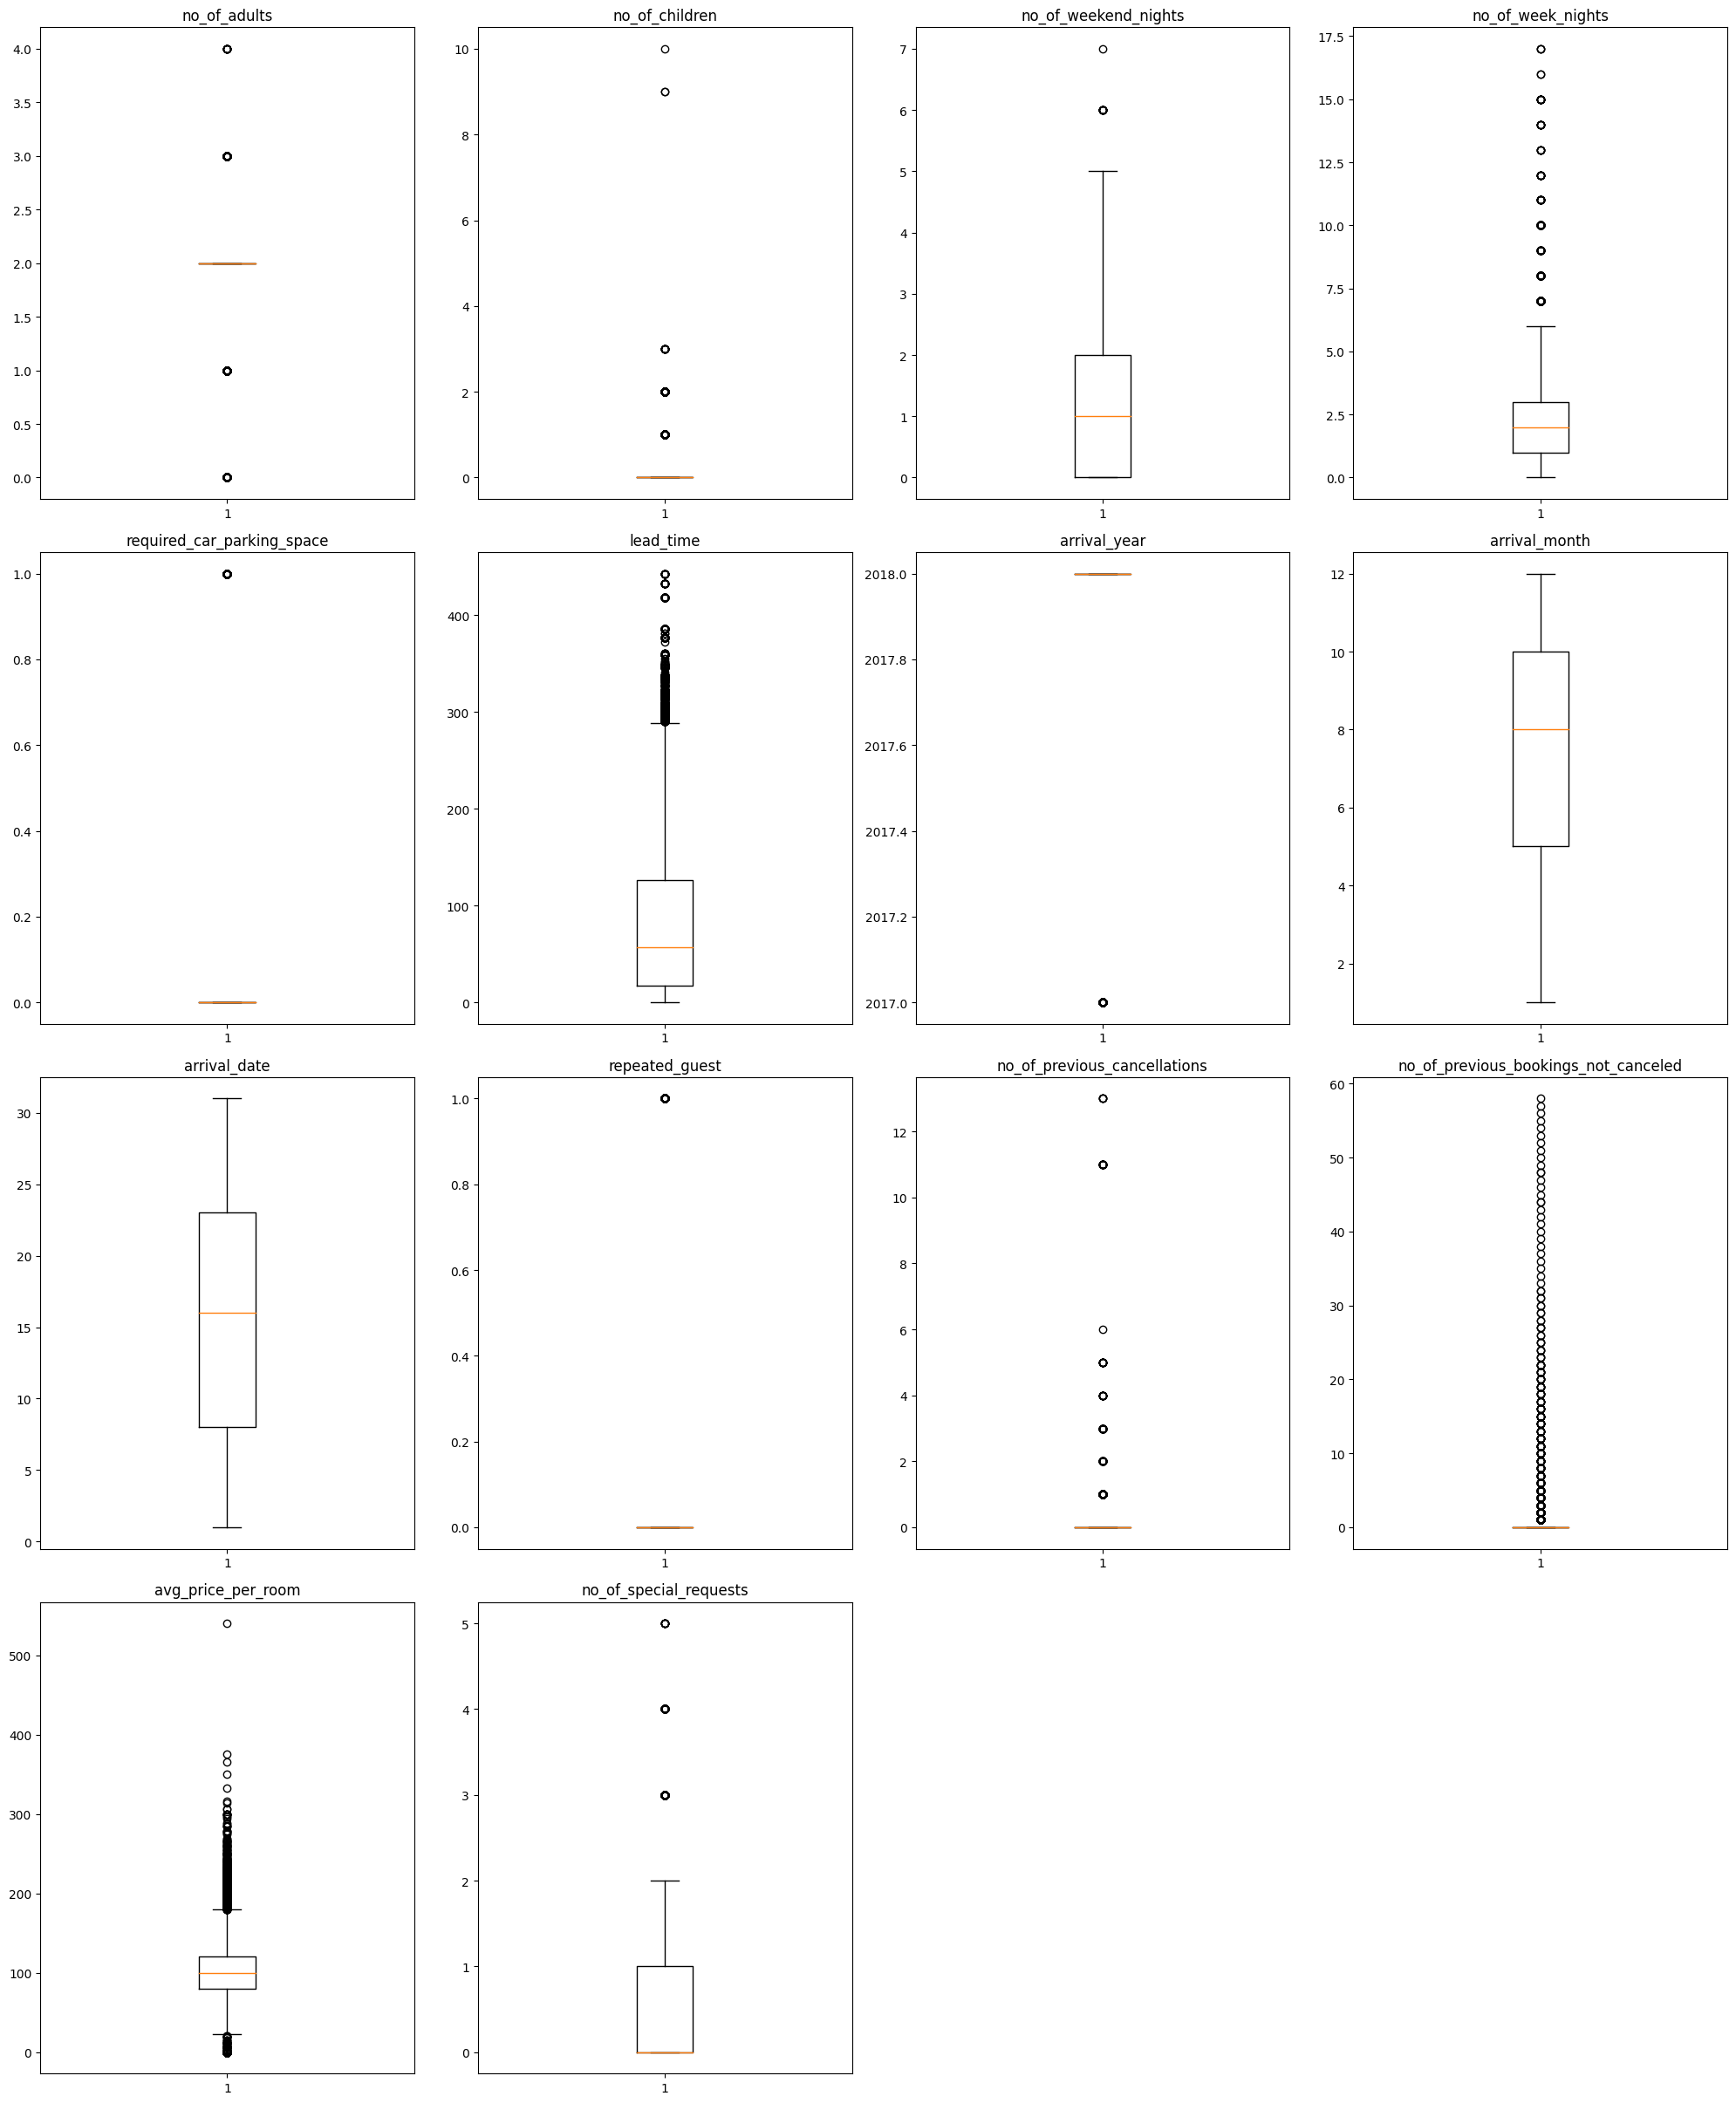

In [339]:
numeric_column = df.select_dtypes(include = np.number)
numeric_column.columns.to_list()

plt.figure(figsize=(20,30))

for i , variable in enumerate (numeric_column):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We can not drop any of the data as this will affect our model building.

##**Model Building**

###**Logistic Regression Model**

**Data Preparation**

In [340]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [341]:
X = df.drop("booking_status", axis = 1)
y = df["booking_status"]

In [342]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,)

In [343]:
X.shape

(36275, 27)

In [344]:
X = X.astype(float) #Making sure are data is in type float

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,2.0,0.0,0.0,0.0,65.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,6.0,0.0,0.0,0.0,106.68,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,28.0,0.0,0.0,0.0,60.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,20.0,0.0,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,11.0,0.0,0.0,0.0,94.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [345]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   required_car_parking_space            36275 non-null  float64
 5   lead_time                             36275 non-null  float64
 6   arrival_year                          36275 non-null  float64
 7   arrival_month                         36275 non-null  float64
 8   arrival_date                          36275 non-null  float64
 9   repeated_guest                        36275 non-null  float64
 10  no_of_previous_cancellations          36275 non-null  float64
 11  no_of_previous_

**Checking Multicollinearity**

- Checking the multicollinearity between any features at this stage to avoid the further model buiding result issues.

In [346]:
#Let's proceed by checking multicollinearity in the dependent variables.

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [347]:
X_scaled

array([[ 0.29889263, -0.26147045,  0.2174012 , ..., -0.24264534,
         1.56383302, -1.33317382],
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.24264534,
        -0.63945446,  0.75008974],
       [-1.62897546, -0.26147045,  1.36599262, ..., -0.24264534,
        -0.63945446,  0.75008974],
       ...,
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.24264534,
        -0.63945446,  0.75008974],
       [ 0.29889263, -0.26147045, -0.93119021, ..., -0.24264534,
        -0.63945446,  0.75008974],
       [ 0.29889263, -0.26147045,  0.2174012 , ..., -0.24264534,
         1.56383302, -1.33317382]])

In [348]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.339197,no_of_adults
1,1.997383,no_of_children
2,1.068618,no_of_weekend_nights
3,1.096936,no_of_week_nights
4,1.036005,required_car_parking_space
5,1.390386,lead_time
6,1.429037,arrival_year
7,1.273706,arrival_month
8,1.006637,arrival_date
9,1.763128,repeated_guest


- VIF score is greater than 5 for market segment amoung from all features
- As market segment shows the multicollinearity between features, we need to drop this before proceeding towards model building.

In [349]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   required_car_parking_space            36275 non-null  float64
 5   lead_time                             36275 non-null  float64
 6   arrival_year                          36275 non-null  float64
 7   arrival_month                         36275 non-null  float64
 8   arrival_date                          36275 non-null  float64
 9   repeated_guest                        36275 non-null  float64
 10  no_of_previous_cancellations          36275 non-null  float64
 11  no_of_previous_

In [350]:
X = df.drop(["booking_status", "market_segment_type"], axis = 1)
y = df["booking_status"]

In [351]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.30, random_state = 105)

In [353]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [354]:
y_pred = log_reg.predict(X_test)

In [355]:
acc = accuracy_score(y_test, y_pred)
acc

0.8066709546999908

In [356]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[2240, 1311],
       [ 793, 6539]])

In [357]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [358]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8066709546999908

In [359]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.6308082230357646

In [360]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7385426969996703

In [361]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6804374240583233

In [362]:
# Predict the probability of the positive class (usually class 1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.8647


**ROC**

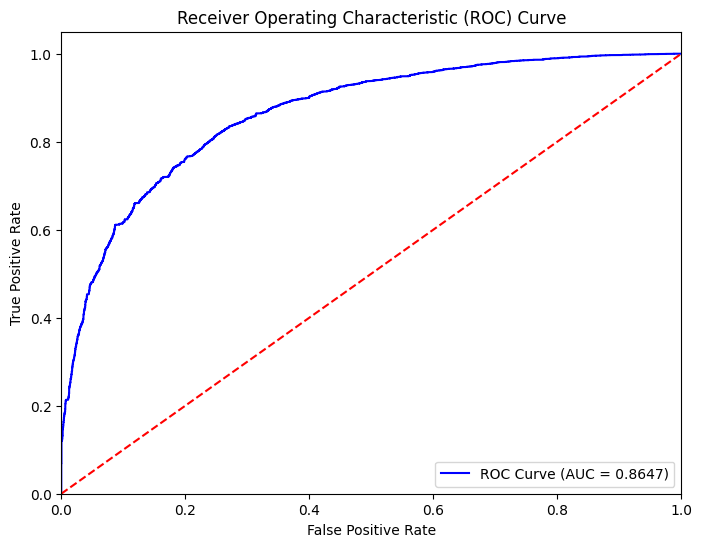

In [363]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels as numeric values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Predict the probability of the positive class (class 1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [364]:
# Calculate the Youden's J statistic for each threshold
youden_j = tpr - fpr

# Find the index of the maximum Youden's J statistic
best_threshold_index = youden_j.argmax()
best_threshold = thresholds[best_threshold_index]

# Output the best threshold
print(f'The best threshold by Youden\'s J statistic is: {best_threshold:.4f}')

# Optionally, you can also calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')

The best threshold by Youden's J statistic is: 0.6482
ROC AUC Score: 0.8647


In [365]:
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test_encoded, y_pred_threshold)
    f1_scores.append(f1)

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
print(f'Best threshold by F1 Score: {best_threshold:.4f}')

Best threshold by F1 Score: 0.4306


**Logistic Regression Model Insights**
- Accuracy : 0.8066
- Precision : 0.6308
- Recall : 0.7385
- F1 Score : 0.6804
- ROC AUC Score: 0.8647
- The best threshold by Youden's J statistic is : 0.6482
- Best threshold by F1 Score : 0.4306

###**KNN Classifier**

In [366]:
# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier

In [367]:
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [368]:
y_pred = knn_3.predict(X_test)

In [369]:
acc = accuracy_score(y_test, y_pred)
acc

0.8526141688872554

In [370]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[2641,  910],
       [ 694, 6638]])

In [371]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [372]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8526141688872554

In [373]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7437341593917206

In [374]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.791904047976012

In [375]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7670636073191983

**K with different values**

In [376]:
# Creating a list of odd values of K for KNN
neighbors = [i for i in range(3, 20) if i % 2 != 0]

# Empty lists to hold recall scores
recall_scores_train = []
recall_scores_test = []

# Perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # Evaluate recall on train and test
    # Ensure that recall_score is used with the correct labels
    scores_train = recall_score(y_train, y_pred_train, labels=['Canceled', 'Not_Canceled'], average='macro')
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test, labels=['Canceled', 'Not_Canceled'], average='macro')
    recall_scores_test.append(scores_test)

print("Recall scores on training set:", recall_scores_train)
print("Recall scores on test set:", recall_scores_test)

Recall scores on training set: [0.8955569238597387, 0.8676089732729928, 0.8554188264305722, 0.8450391502974521, 0.839297442908753, 0.8323374931975192, 0.8271086677469601, 0.8233317134840257, 0.8216321378777914]
Recall scores on test set: [0.8245402930073715, 0.8227319075806466, 0.8161096364823814, 0.8155836902631333, 0.8151259382610156, 0.8114365562177686, 0.8098415873877686, 0.805140065660027, 0.806530451838636]


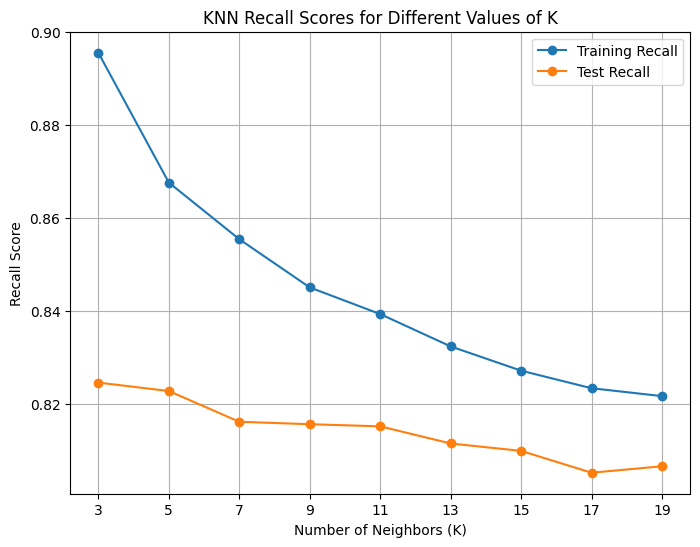

In [377]:
# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

**KNN Classifier Model Insights**
- Accuracy : 0.8526
- Presion : 0.7437
- Recall : 0.7919
- F1 Score : 0.7670
- By observing the KNN recall scores for different values, the best appropriate K is 19

###**Naive-Bayes Classifier**

In [378]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [379]:
# To build model for prediction
from sklearn.naive_bayes import GaussianNB

In [380]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

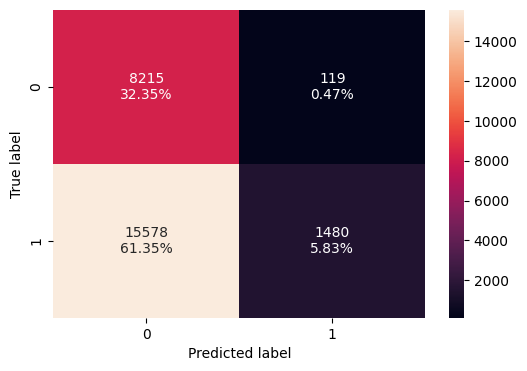

In [381]:
confusion_matrix_sklearn(nb, X_train, y_train)

In [382]:
y_pred = nb.predict(X_test)

In [383]:
acc = accuracy_score(y_test, y_pred)
acc

0.380869245612423

In [384]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[3495,   56],
       [6682,  650]])

In [385]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [386]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.380869245612423

In [387]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9842297944241059

In [388]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.3434214405030952

In [389]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.5091783216783216

**Naive-Bayes Classifier Model Insights**
- Accuracy : 0.3808
- Presion : 0.9842
- Recall : 0.3434
- F1 Score : 0.5091

###**SVM Classifier**

In [390]:
df1 = data.copy()

df1["booking_status"] = df1["booking_status"].map({"Canceled":1, "Not_Canceled":0})
df1["booking_status"].unique()

array([0, 1])

In [391]:
X = df1.drop(["booking_status", "market_segment_type"], axis = 1)
y = df1["booking_status"]

In [392]:
X = X.drop("Booking_ID", axis = 1)
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,0,0,0,94.50,0


In [393]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,)

In [394]:
X.shape

(36275, 23)

In [395]:
X = X.astype(float) #Making sure are data is in type float

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,2.0,0.0,0.0,0.0,65.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,6.0,0.0,0.0,0.0,106.68,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,28.0,0.0,0.0,0.0,60.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,20.0,0.0,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,11.0,0.0,0.0,0.0,94.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [396]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   required_car_parking_space            36275 non-null  float64
 5   lead_time                             36275 non-null  float64
 6   arrival_year                          36275 non-null  float64
 7   arrival_month                         36275 non-null  float64
 8   arrival_date                          36275 non-null  float64
 9   repeated_guest                        36275 non-null  float64
 10  no_of_previous_cancellations          36275 non-null  float64
 11  no_of_previous_

In [397]:
y = y.astype(float)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36275 entries, 0 to 36274
Series name: booking_status
Non-Null Count  Dtype  
--------------  -----  
36275 non-null  float64
dtypes: float64(1)
memory usage: 283.5 KB


In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 200)

In [399]:
# To build model for prediction
from sklearn.svm import SVC

In [400]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

SVC(kernel='linear')

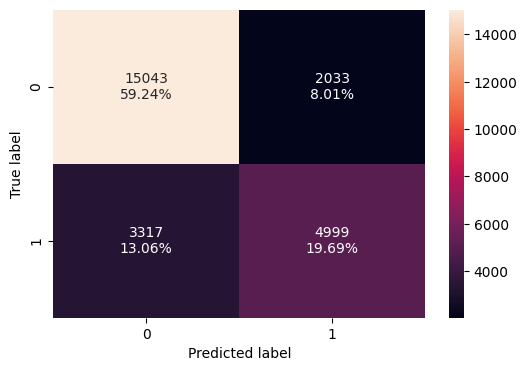

In [401]:
confusion_matrix_sklearn(svm, X_train, y_train)

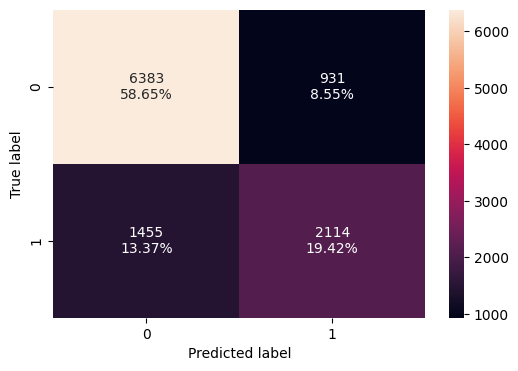

In [402]:
confusion_matrix_sklearn(svm, X_test, y_test)

In [403]:
# defining a function to compute different metrics to check performance of a classification model
def model_performance_classification(
    model, predictors, target
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting the class labels.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [404]:
SVM_linear_train = model_performance_classification(svm, X_train, y_train)
SVM_linear_train

,Accuracy,Recall,Precision,F1
0,0.789304,0.60113,0.710893,0.65142


In [405]:
SVM_linear_test = model_performance_classification(svm, X_test, y_test)
SVM_linear_test

,Accuracy,Recall,Precision,F1
0,0.780759,0.592323,0.694253,0.63925


**SVM Model Performance Improvement**

**Support Vector Machine (Kernel = "Polynomial" , Degree = 2, gamma = 0.01, C = 0.05 )**

In [406]:
svm = SVC(kernel = "poly", degree = 2, gamma = 0.01, C = 0.05)
svm.fit(X_train, y_train)

SVC(C=0.05, degree=2, gamma=0.01, kernel='poly')

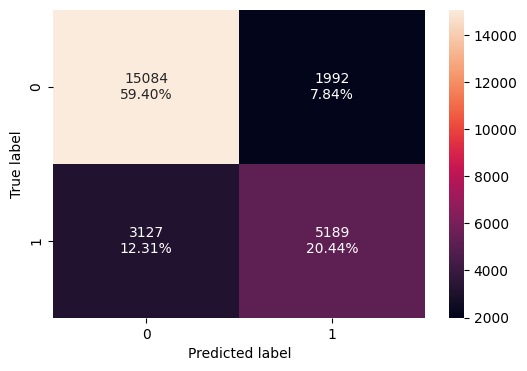

In [407]:
confusion_matrix_sklearn(svm, X_train, y_train)

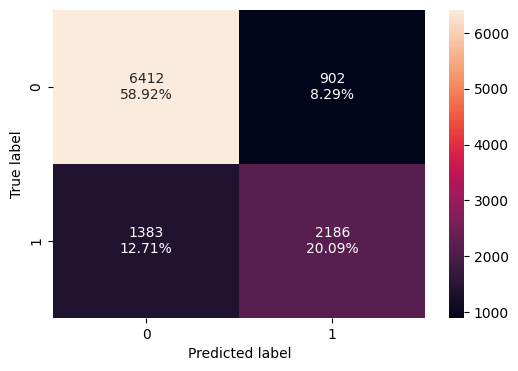

In [408]:
confusion_matrix_sklearn(svm, X_test, y_test)

In [409]:
SVM_poly_train1 = model_performance_classification(svm, X_train, y_train)
SVM_poly_train1

,Accuracy,Recall,Precision,F1
0,0.798401,0.623978,0.722601,0.669678


In [410]:
SVM_poly_test1 = model_performance_classification(svm, X_test, y_test)
SVM_poly_test1

,Accuracy,Recall,Precision,F1
0,0.79004,0.612496,0.707902,0.656752


**Support Vector Machine (Kernel = "Polynomial" , Degree = 2, gamma = 0.03, C = 0.07 )**

In [411]:
svm = SVC(kernel = "poly", degree = 2, gamma = 0.03, C = 0.07)
svm.fit(X_train, y_train)

SVC(C=0.07, degree=2, gamma=0.03, kernel='poly')

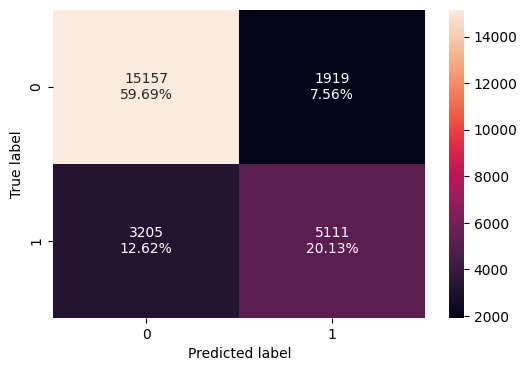

In [412]:
confusion_matrix_sklearn(svm, X_train, y_train)

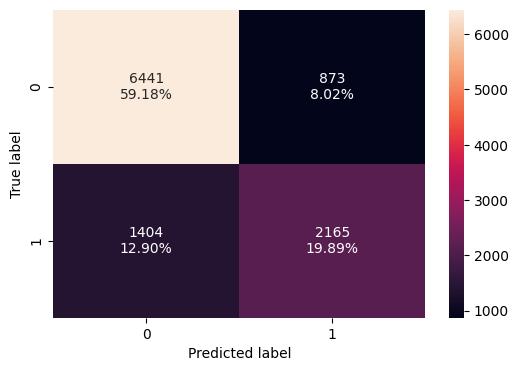

In [413]:
confusion_matrix_sklearn(svm, X_test, y_test)

In [414]:
SVM_poly_train2 = model_performance_classification(svm, X_train, y_train)
SVM_poly_train2

,Accuracy,Recall,Precision,F1
0,0.798204,0.614598,0.727027,0.666102


In [415]:
SVM_poly_test2 = model_performance_classification(svm, X_test, y_test)
SVM_poly_test2

,Accuracy,Recall,Precision,F1
0,0.790775,0.606612,0.71264,0.655366


**Support Vector Machine (Kernel = "Rbf")**

In [416]:
svm = SVC(kernel = "rbf")
svm.fit(X_train, y_train)

SVC()

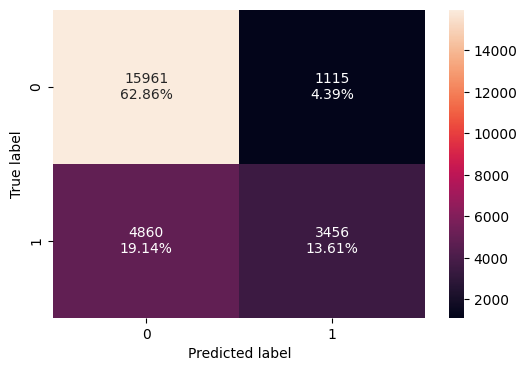

In [417]:
confusion_matrix_sklearn(svm, X_train, y_train)

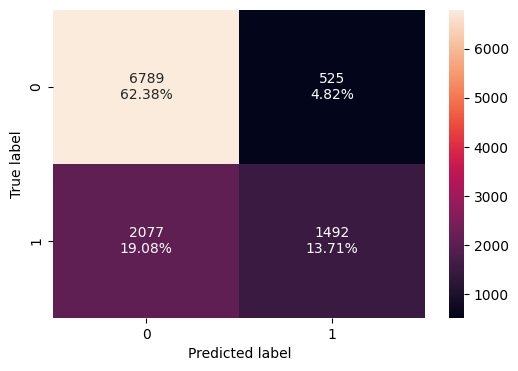

In [418]:
confusion_matrix_sklearn(svm, X_test, y_test)

In [419]:
SVM_rbf_train = model_performance_classification(svm, X_train, y_train)
SVM_rbf_train

,Accuracy,Recall,Precision,F1
0,0.76469,0.415584,0.756071,0.536354


In [420]:
SVM_rbf_test = model_performance_classification(svm, X_test, y_test)
SVM_rbf_test

,Accuracy,Recall,Precision,F1
0,0.760912,0.418044,0.739712,0.534193


**Model Performance Comparison and Final Model Selection**

In [421]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        SVM_linear_train.T,
        SVM_poly_train1.T,
        SVM_poly_train2.T,
        SVM_rbf_train.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "SVM-Linear Kernel",
    "SVM-Polynomial Kernel , degree = 2, gamma = 0.01, C = 0.05",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.03 , C = 0.07 ",
    "SVM-Rbf Kernel",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,SVM-Linear Kernel,"SVM-Polynomial Kernel , degree = 2, gamma = 0.01, C = 0.05","SVM-Polynomial Kernel , degree = 2 , gamma = 0.03 , C = 0.07",SVM-Rbf Kernel
Accuracy,0.789304,0.798401,0.798204,0.764690
Recall,0.601130,0.623978,0.614598,0.415584
Precision,0.710893,0.722601,0.727027,0.756071
F1,0.651420,0.669678,0.666102,0.536354


In [422]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        SVM_linear_test.T,
        SVM_poly_test1.T,
        SVM_poly_test2.T,
        SVM_rbf_test.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "SVM-Linear Kernel",
    "SVM-Polynomial Kernel , degree = 2, gamma = 0.01, C = 0.05",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.03 , C = 0.07 ",
    "SVM-Rbf Kernel",
]

print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,SVM-Linear Kernel,"SVM-Polynomial Kernel , degree = 2, gamma = 0.01, C = 0.05","SVM-Polynomial Kernel , degree = 2 , gamma = 0.03 , C = 0.07",SVM-Rbf Kernel
Accuracy,0.780759,0.790040,0.790775,0.760912
Recall,0.592323,0.612496,0.606612,0.418044
Precision,0.694253,0.707902,0.712640,0.739712
F1,0.639250,0.656752,0.655366,0.534193


**SVM Classifier Model Insights**
- All the models performed well on both training and test data.
- The model ( SVM-Polynomial Kernel , degree = 2 , gamma = 0.01, C = 0.05 ) is the best in terms of the train and test scores.
- We have selected best model by considering only above performed parameters there will be such more combinations of degree, gamma and C value which gives us better model to retrive the positive valuable growth to company.
- We will create the model by using different methods such as cross validation, grid search, hyperparameter tunning, ensemble methods.

##**Actionable Insights & Recommendations**

###**Final selected model from above performed different models**

**Logistic Regression Model Insights**
- Accuracy : 0.8066
- Precision : 0.6308
- Recall : 0.7385
- F1 Score : 0.6804
- ROC AUC Score: 0.8647
- The best threshold by Youden's J statistic is : 0.6482
- Best threshold by F1 Score : 0.4306


**KNN Classifier Model Insights**
- Accuracy : 0.8526
- Precision : 0.7437
- Recall : 0.7919
- F1 Score : 0.7670
- By observing the KNN recall scores for different values, the best appropriate K is 19


**Naive-Bayes Classifier Model Insights**
- Accuracy : 0.3808
- Precision : 0.9842
- Recall : 0.3434
- F1 Score : 0.5091


**SVM Classifier Model Insights**
- The model ( SVM-Polynomial Kernel , degree = 2 , gamma = 0.01, C = 0.05 ) is the best in terms of the train and test scores.
- Accuracy : 0.7984
- Precision : 0.6239
- Recall : 0.7226
- F1 Score : 0.6695



**Several models were evaluated, including Logistic Regression, KNN, Naive Bayes, and SVM. The KNN Classifier (K=19) demonstrated the best overall performance based on accuracy, precision, recall, and F1-score.**

###**Recommendations**:

- **Targeted Promotions**: Focus on attracting guests during off-peak periods.

- **Loyalty Programs**: Strengthen loyalty initiatives to retain repeat guests.

- **Incentivize Special Requests**: Offer promotions or perks for guests who make special requests, potentially reducing cancellations.

- **Dynamic Pricing**: Adjust pricing based on lead time and demand to optimize revenue.

- **Cancellation Policies**: Consider implementing stricter cancellation policies for online bookings or high-risk segments.

###**Further Exploration:**

- **Feature Engineering**: Explore creating new features to improve model performance.

- **Hyperparameter Tuning**: Fine-tune model parameters for optimal results.

- **Ensemble Methods**: Investigate combining multiple models to enhance predictive power.

By leveraging the insights from this analysis and implementing data-driven strategies, INN Hotels can potentially reduce booking cancellations and improve overall profitability.